# <font color = 'color'>모두의 딥러닝: 10장(p.122), 11장(p.130)</font>

# <font color = 'blue'>문제 정의</font>

### 피마인디언 당뇨병 데이터셋(Pima Indians Diabetes Dataset)
* 이진/이항(binary-class) 분류(classification) 문제
* 유전이나 식습관 등이 당뇨병에 발생유무에 미치는 영향에 관한 문제상황

<img src = './../../images/pima.png'>

1. 피처(입력/예측/독립)변수
    * pregnant: 과거 임신 횟수
    * plasma: 포도당 부하 검사 2시간 후 공복 혈당 농도(mm Hg)
    * pressure: 확장기 혈압(mm Hg)
    * thickness: 삼두근 피부 주름 두께(mm)
    * insulin: 2시간 혈청 인슐린(2-hour, mu U/ml)
    * BMI: 체질량 지수(BMI, weight in kg/(height in m)2)
    * pedigree: 당뇨병 가족력
    * age: 나이<pre>
* 타깃(출력/반응/종속)변수
    * class: 5년이내 당뇨병 발병여부: 당뇨(1), 당뇨 아님(0)

# <font color = 'blue'>데이터 준비</font>

### 데이터가 위치한 경로파악

In [1]:
import os
os.listdir()

['.ipynb_checkpoints',
 '01. 판다스기본.ipynb',
 '01_선형회귀_최소제곱법_모두의 딥러닝_3장(p.42).ipynb',
 '02. 판다스 데이터프레임과 시리즈.ipynb',
 '02_선형회귀_경사하강법_모두의 딥러닝_4장(p.63).ipynb',
 '03. 그래프 그리기.ipynb',
 '03.그래프 그리기(매트플롯리브 패키지 중심).ipynb',
 '03_로지스틱회귀_모두의 딥러닝_5장(p.79).ipynb',
 '04. 데이터 연결하기.ipynb',
 '04_단층다층퍼셉트론_오차역전파_심층신경망_모두의 딥러닝_6장-9장 (1).ipynb',
 '05. 결측치 처리하기(일부코드).ipynb',
 '05. 결측치 처리하기.ipynb',
 '05_이진분류_피마당뇨병 데이터셋_모두의 딥러닝_10장(p.122)_11장(p.130).ipynb',
 '06. 깔끔한(tidy) 데이터 만들기.ipynb',
 '07. 판다스 자료형 다루기.ipynb',
 '08. 문자열 다루기.ipynb',
 '09. matplotlib와 한글폰트.ipynb',
 '10. 정규표현식 다루기.ipynb',
 '1장. sklearn패키지_iris 데이터셋(knn분류예측).ipynb',
 '2장. mglearn패키지_forge 데이터셋(knn분류예측).ipynb',
 'cancer_tree.dot',
 'cancer_tree.png',
 'GermanCredit.csv',
 'mychar.ipynb',
 'mychar.py',
 'tmp',
 'tmp.png',
 'Untitled.ipynb',
 '__pycache__',
 '데이터연결연습용 데이터셋.zip',
 '뮐가런_2.3.2_k-최근접이웃_mglearn패키지_wave 데이터(knn최근접이웃회귀).ipynb',
 '뮐가런_2.3.2_k-최근접이웃_sklearn패키지_breast cancer 데이터셋 분류예측.ipynb',
 '뮐가런_2.3.3 선형모델_분류용 선형모형.ipynb',
 '뮐가런_2.3.3 선형

In [2]:
os.listdir(path = './../../data')

['billboard.csv',
 'concat',
 'country_timeseries.csv',
 'gapminder.tsv',
 'name.xls',
 'name.xlsx',
 'pew.csv',
 'pima-indians-diabetes.csv',
 'pima_new.csv',
 'sci.xls',
 'sci.xlsx',
 'scientists.csv',
 'scientists_df.csv',
 'scientists_df.pickle',
 'scientists_df.tsv',
 'scientists_name.csv',
 'scientists_name.pickle',
 'scientists_name.tsv',
 'weather.csv',
 'weather_survey',
 '데이터연결연습용 데이터셋.zip']

### 데이터 로딩

In [3]:
# pandas를 이용한 데이터프레임 겍체로 로딩
import pandas as pd

In [4]:
# 헤더가 없는 데이터셋 그대로 로딩
# - df: dataframe
df = pd.read_csv('./../../data/pima-indians-diabetes.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# 현재 변수컬럼은 번호 인덱스로 되어 있음
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [6]:
# 변수컬럼 입력
df.columns = ['pregnant', 'plasma', 'pressure', 'thickness', 
              'insulin', 'BMI', 'pedigree', 'age', 'class']
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# 헤더가 없는 데이터셋에 변수컬럼명을 직접입력하면서 로딩
# - dt: datatable
dt = pd.read_csv('./../../data/pima-indians-diabetes.csv', header = None,
                 names = ['pregnant', 'plasma', 'pressure', 'thickness', 
                          'insulin', 'BMI', 'pedigree', 'age', 
                          'class'])

In [8]:
print(type(dt), df.shape, '\n') # 객체유형과 규모(행, 열)파악
print(dt.columns, '\n') # 변수컬럼명 파악
print(dt.index, '\n') # 행번호 파악
print(dt.values[0:10]) # raw데이터 파악

<class 'pandas.core.frame.DataFrame'> (768, 9) 

Index(['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'BMI',
       'pedigree', 'age', 'class'],
      dtype='object') 

RangeIndex(start=0, stop=768, step=1) 

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01 1.000e+00]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01 0.000e+00]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01 1.000e+00]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01 0.000e+00]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01 1.000e+00]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01 0.000e+00]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01 1.000e+00]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01 0.000e+00]
 [2.000e+00 1.970e+

간혹 딥러닝에서 pd값을 못받는 병우가 있어 그래서 raw데이터로 만들어서 배열포맷으로 불러오는 values값 사용하기도 한다.

In [9]:
# numpy를 이용한 다차원배열 겍체로 로딩
# - da: data
import numpy as np
da = np.loadtxt('./../../data/pima-indians-diabetes.csv', delimiter = ',', 
                dtype={'names': ('pregnant', 'plasma', 'pressure', 'thickness', 
                                 'insulin', 'BMI', 'pedigree', 'age', 'class'), 
                       'formats': ('i4', 'i4', 'i4', 'i4', 'i4', 'f4', 'f4', 'i4', 'i4')})
print(type(da), da.shape)
print()
da[0:10]

<class 'numpy.ndarray'> (768,)



array([( 6, 148, 72, 35,   0, 33.6, 0.627, 50, 1),
       ( 1,  85, 66, 29,   0, 26.6, 0.351, 31, 0),
       ( 8, 183, 64,  0,   0, 23.3, 0.672, 32, 1),
       ( 1,  89, 66, 23,  94, 28.1, 0.167, 21, 0),
       ( 0, 137, 40, 35, 168, 43.1, 2.288, 33, 1),
       ( 5, 116, 74,  0,   0, 25.6, 0.201, 30, 0),
       ( 3,  78, 50, 32,  88, 31. , 0.248, 26, 1),
       (10, 115,  0,  0,   0, 35.3, 0.134, 29, 0),
       ( 2, 197, 70, 45, 543, 30.5, 0.158, 53, 1),
       ( 8, 125, 96,  0,   0,  0. , 0.232, 54, 1)],
      dtype=[('pregnant', '<i4'), ('plasma', '<i4'), ('pressure', '<i4'), ('thickness', '<i4'), ('insulin', '<i4'), ('BMI', '<f4'), ('pedigree', '<f4'), ('age', '<i4'), ('class', '<i4')])

# <font color = 'blue'>데이터 탐색</font>

### 간단조회

In [10]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.tail()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### 데이터셋 구조형식 특성파악

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 데이터셋 간단 기술통계분석

In [13]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# <font color = 'blue'>데이터 인덱싱</font>

### 피처 단일인덱싱
* 한 번에 한 개 변수컬럼을 인덱싱하는 방법

In [14]:
df.BMI.head(3)
# - df 데이터프레임 객체의 속성 중의 하나로 BMI을 간주해 점(.속성)을 찍어 인덱싱
# - 인덱싱 결과 BMI 변수컬럼에 속한 여러 개의 요소값들을 한데 묶어 놓은 pandas Series(시리즈) 객체형식임

0    33.6
1    26.6
2    23.3
Name: BMI, dtype: float64

In [15]:
df['BMI'].head(3)
# - df 데이터프레임 객체의 변수컬럼 중의 하나로 BMI을 간주해 대괄호 []를 이용해 인덱싱
# - 인덱싱 결과 BMI 변수컬럼에 속한 여러 개의 요소값들을 한데 묶어 놓은 pandas Series(시리즈) 객체형식임

0    33.6
1    26.6
2    23.3
Name: BMI, dtype: float64

In [16]:
df[['BMI']].head(3)
# - df 데이터프레임 객체의 변수컬럼 중의 하나로 BMI을 간주해 대괄호 []를 이용해 인덱싱
# - 바깥쪽 대괄호[]는 변수컬럼 인덱싱을 위한 기호이며, 
#   안쪽 대괄호[]는 한 번에 여러 개의 변수컬럼을 인덱싱하기 위해 리스트로 만들기 위한 표기법임
# - 인덱싱 결과 BMI라는 변수컬럼으로 구성된 pandas DataFrame 객체형식임

,BMI
0,33.6
1,26.6
2,23.3


In [17]:
type(df[['BMI']].head(3))
# - 인덱싱 결과 BMI라는 변수컬럼으로 구성된 pandas DataFrame 객체형식임

pandas.core.frame.DataFrame

### 피처 복수인덱싱
* 여러 개의 원하는 변수컬럼을 선별해서 동시에 인덱싱하는 방법

In [18]:
df[['pregnant', 'BMI']].head(3)
# - 바깥쪽 대괄호[]는 변수컬럼 인덱싱을 위한 기호이며, 
#   안쪽 대괄호[]는 한 번에 여러 개의 변수컬럼을 인덱싱하기 위해 리스트로 만들기 위한 표기법임

,pregnant,BMI
0,6,33.6
1,1,26.6
2,8,23.3


In [19]:
df.loc[:, ['pregnant', 'BMI']].head(3)
# - .loc 메서드는 인덱싱하고자 하는 변수컬럼의 이름을 이용하는 방식임 

,pregnant,BMI
0,6,33.6
1,1,26.6
2,8,23.3


In [20]:
df.iloc[:, [0, 5]].head(3)
# - .iloc 메서드는 인덱싱하고자 하는 변수컬럼의 인덱스번호를 사용하는 방식임 

,pregnant,BMI
0,6,33.6
1,1,26.6
2,8,23.3


### 피처 슬라이싱
* 연속적으로 붙어있는 여러 개 변수컬럼을 동시에 인덱싱하는 방법

In [21]:
df.iloc[:, 0:5].head(3)

,pregnant,plasma,pressure,thickness,insulin
0,6,148,72,35,0
1,1,85,66,29,0
2,8,183,64,0,0


# <font color = 'blue'>데이터 그래프 탐색</font>

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df.head(2) # 변수컬럼 이름확인

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


### 피처와 클래스 관련성 파악

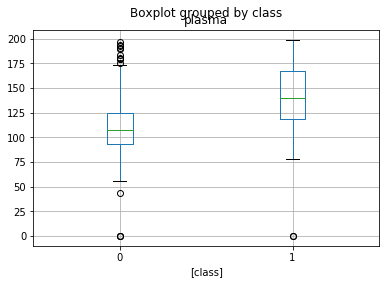

In [24]:
# 특정 피처에 따른 클래스 분류 가능성 탐색
box = df[['plasma', 'class']].boxplot(by='class')
# - matplotlib.pyplot 이용

일부 겹치는 부분이 있으나 서로 분류가 가능하게 확실히 다른 범위를 갖고 있다.  <br>
plasma는 분류하기 좋은 변수라 할 수 있다 <br>
하지만, plasma가 아웃라이어가 많아서 이 부분은 제거해주는게 좋다.

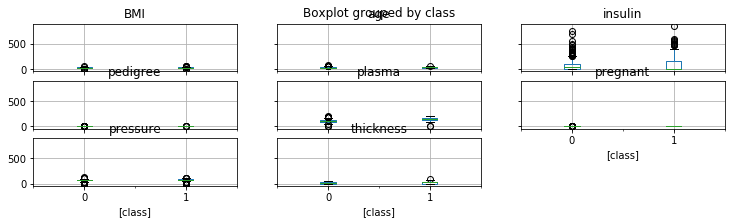

In [25]:
# 피처변수에 따른 클래스 분류 가능성 탐색 -> 클래스 기준변수에 따라서 박스를 그려줌
box = df.boxplot(by='class', figsize=(12, 3))
# - matplotlib.pyplot 이용

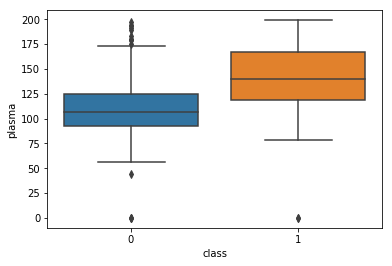

In [26]:
# 특정 피처에 따른 클래스 분류 가능성 탐색
sns.boxplot(x = "class", y = 'plasma', data = df)
# - seaborn 라이브러리 이용

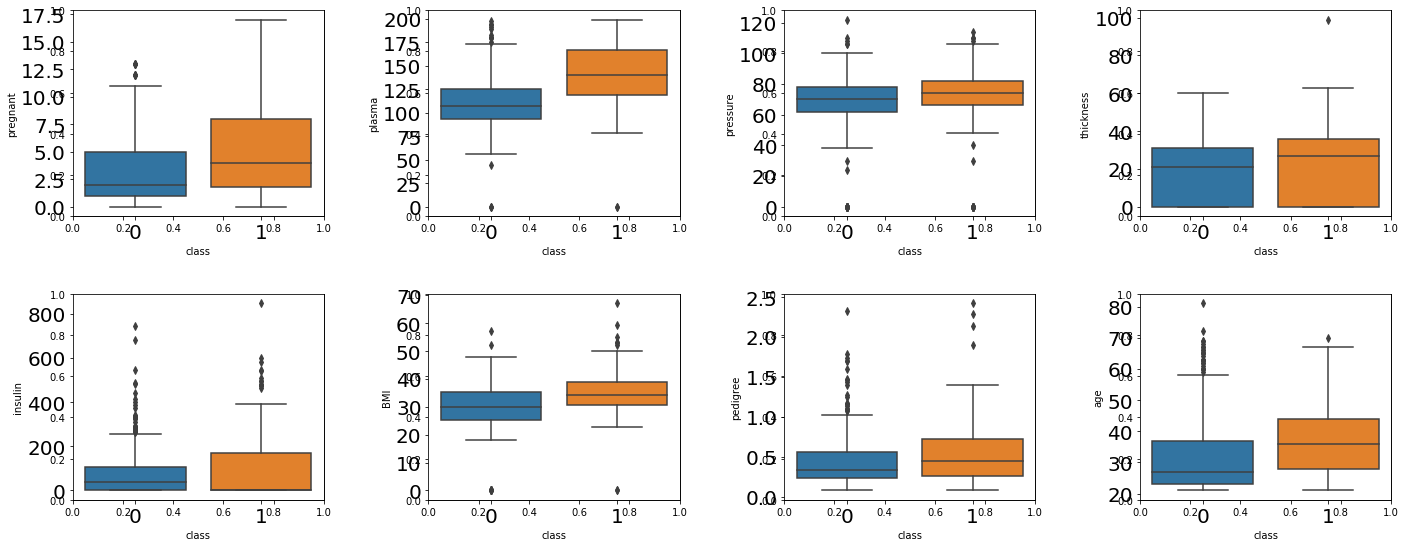

In [27]:
# 피처변수에 따른 클래스 분류 가능성 탐색
fig, axes = plt.subplots(2, 4, figsize = (20, 8))        # 2 X 4로 구성
for idx, feature in enumerate(list(df.columns)[:-1]):    # enumerate : 갖고 온 임시 순서 번호를 함께 넣어주는 아이. 그래서 2개로 같이 받아줌
    ax = fig.add_subplot(2, 4, idx + 1, )
    box = sns.boxplot(x = 'class', y = feature, data = df, ax = ax) # A
    plt.setp(box.get_xticklabels(), fontsize = 20)
    plt.setp(box.get_yticklabels(), fontsize = 20)
fig.tight_layout() 
# - seaborn 라이브러리 이용

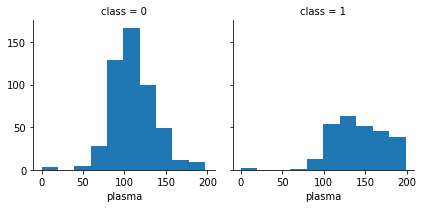

In [28]:
grid = sns.FacetGrid(df, col = 'class')
grid.map(plt.hist, 'plasma', bins = 10)

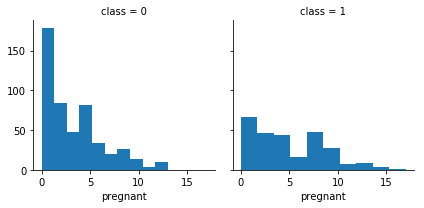

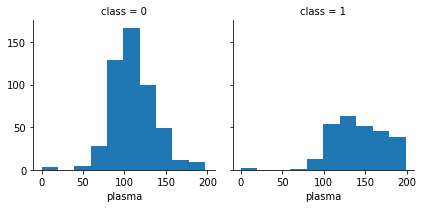

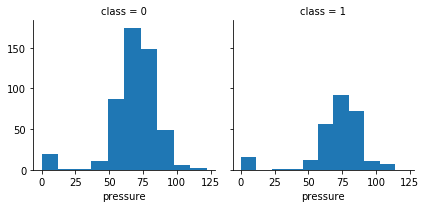

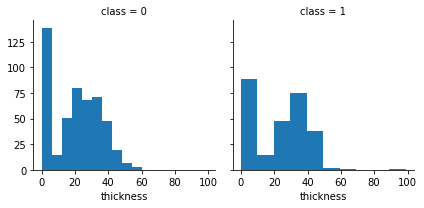

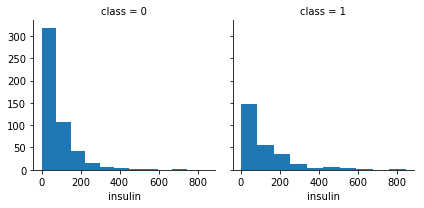

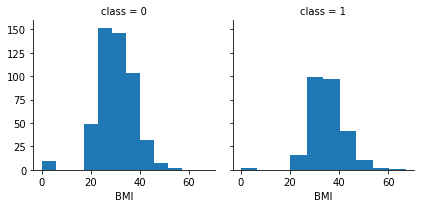

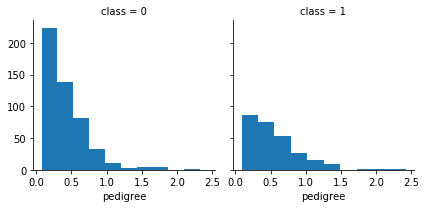

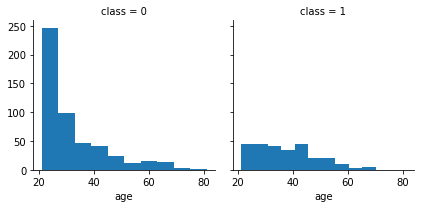

In [29]:
for idx, feature in enumerate(list(df.columns)[:-1]):
    grid = sns.FacetGrid(df, col = 'class')
    grid.map(plt.hist, feature, bins = 10)    

### 산점도 매트릭스 파악

In [30]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


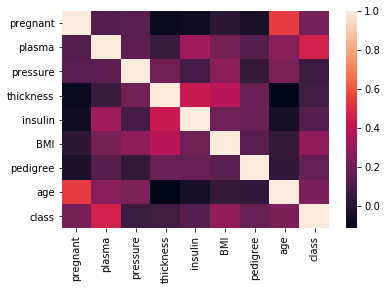

In [31]:
plt.figure()
sns.heatmap(df.corr())

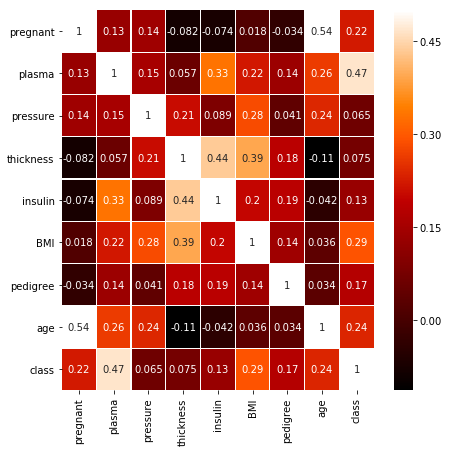

In [32]:
plt.figure(figsize = (7, 7))
sns.heatmap(df.corr(), vmax = 0.5, cmap = plt.cm.gist_heat, linewidth = 0.1, linecolor = 'white', annot = True)

C:\anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


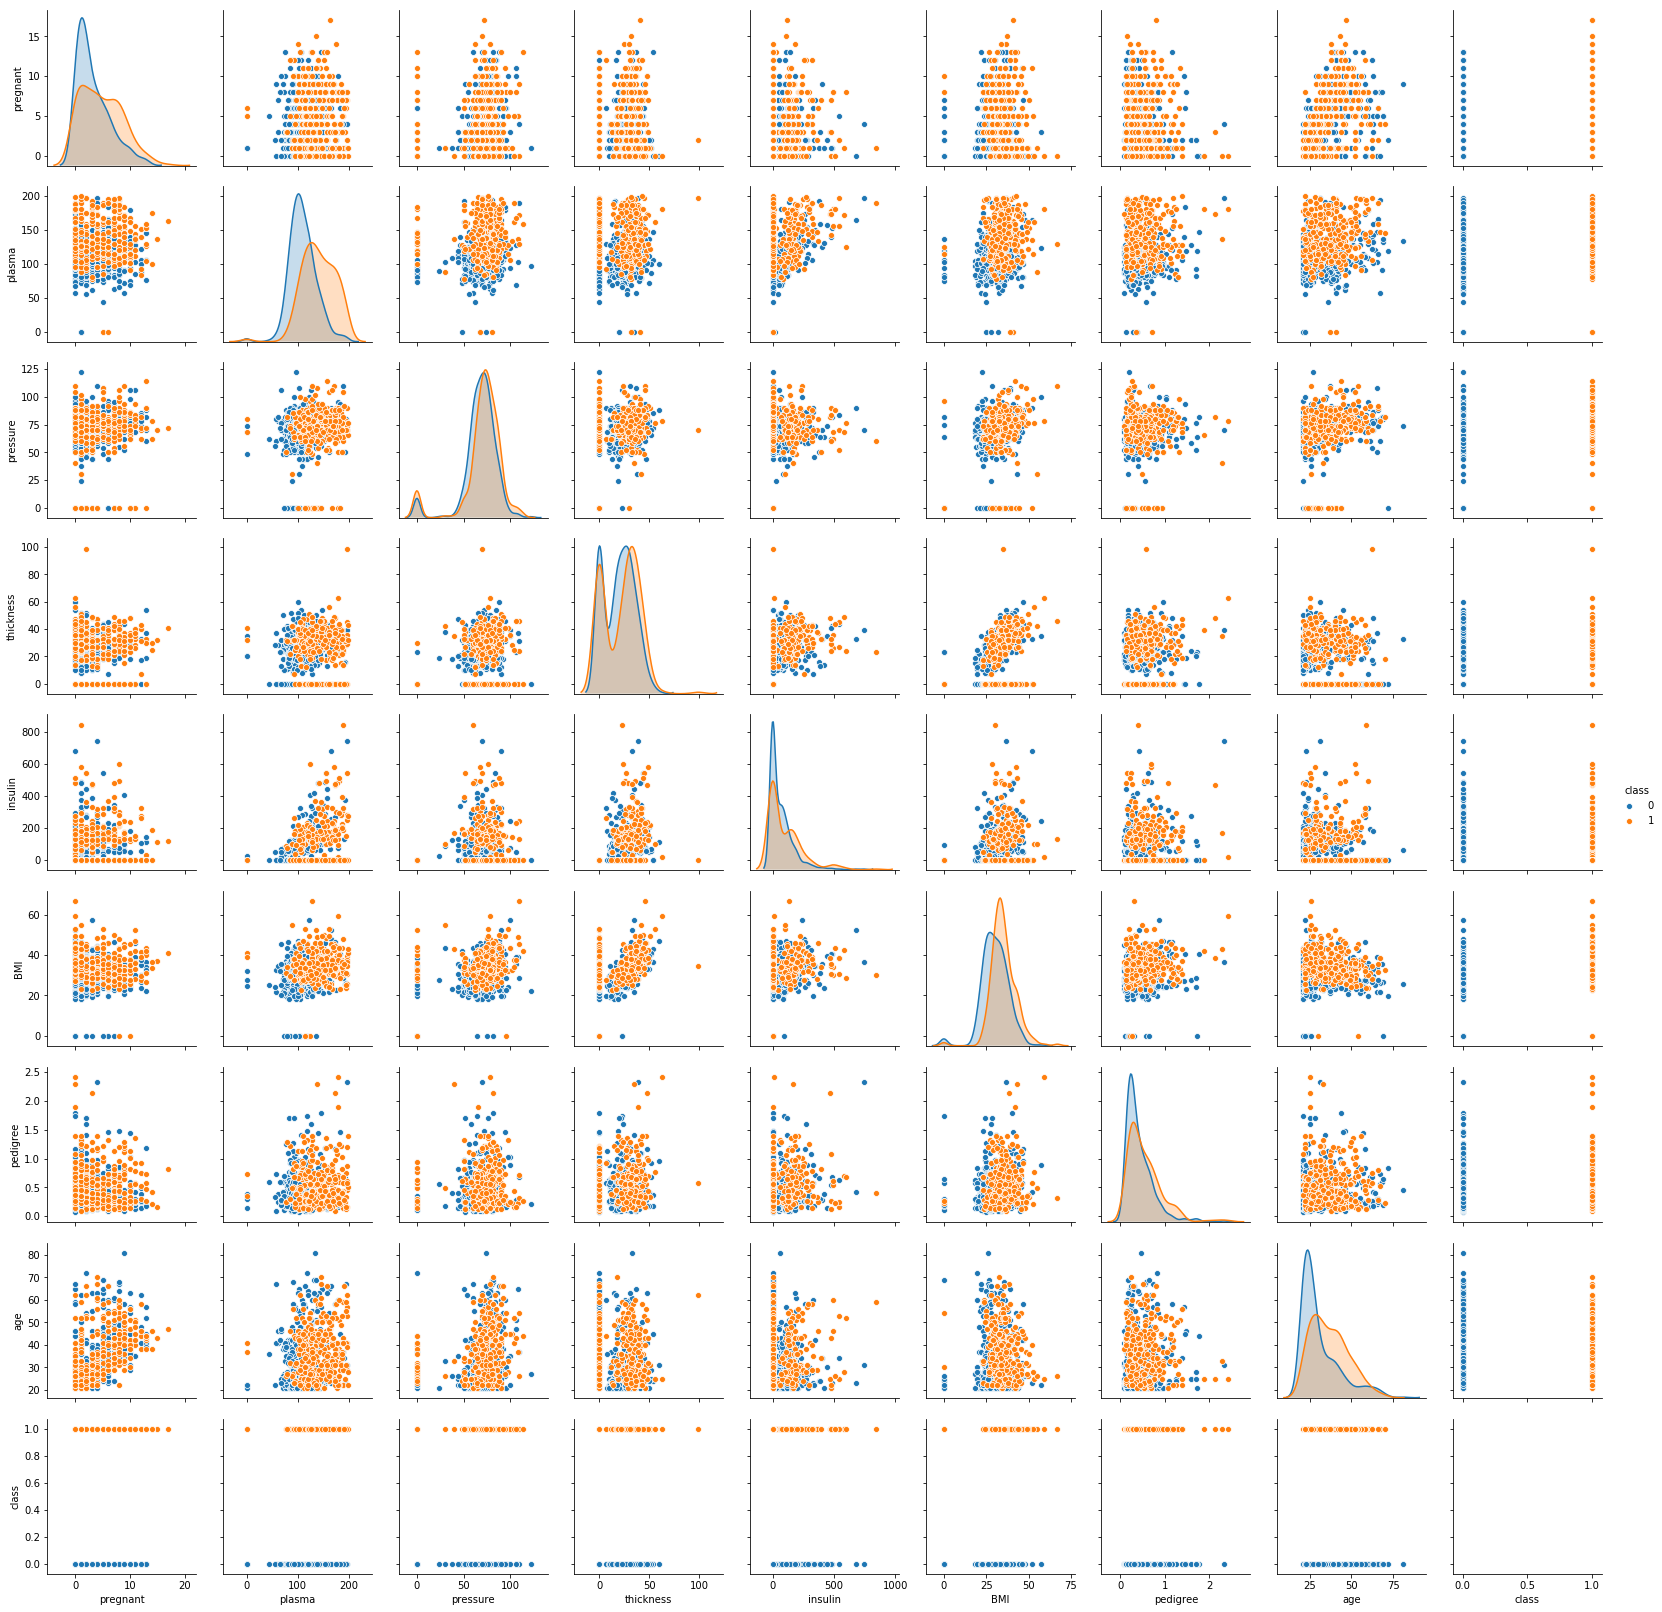

In [33]:
pp = sns.pairplot(df, hue = 'class')

C:\anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


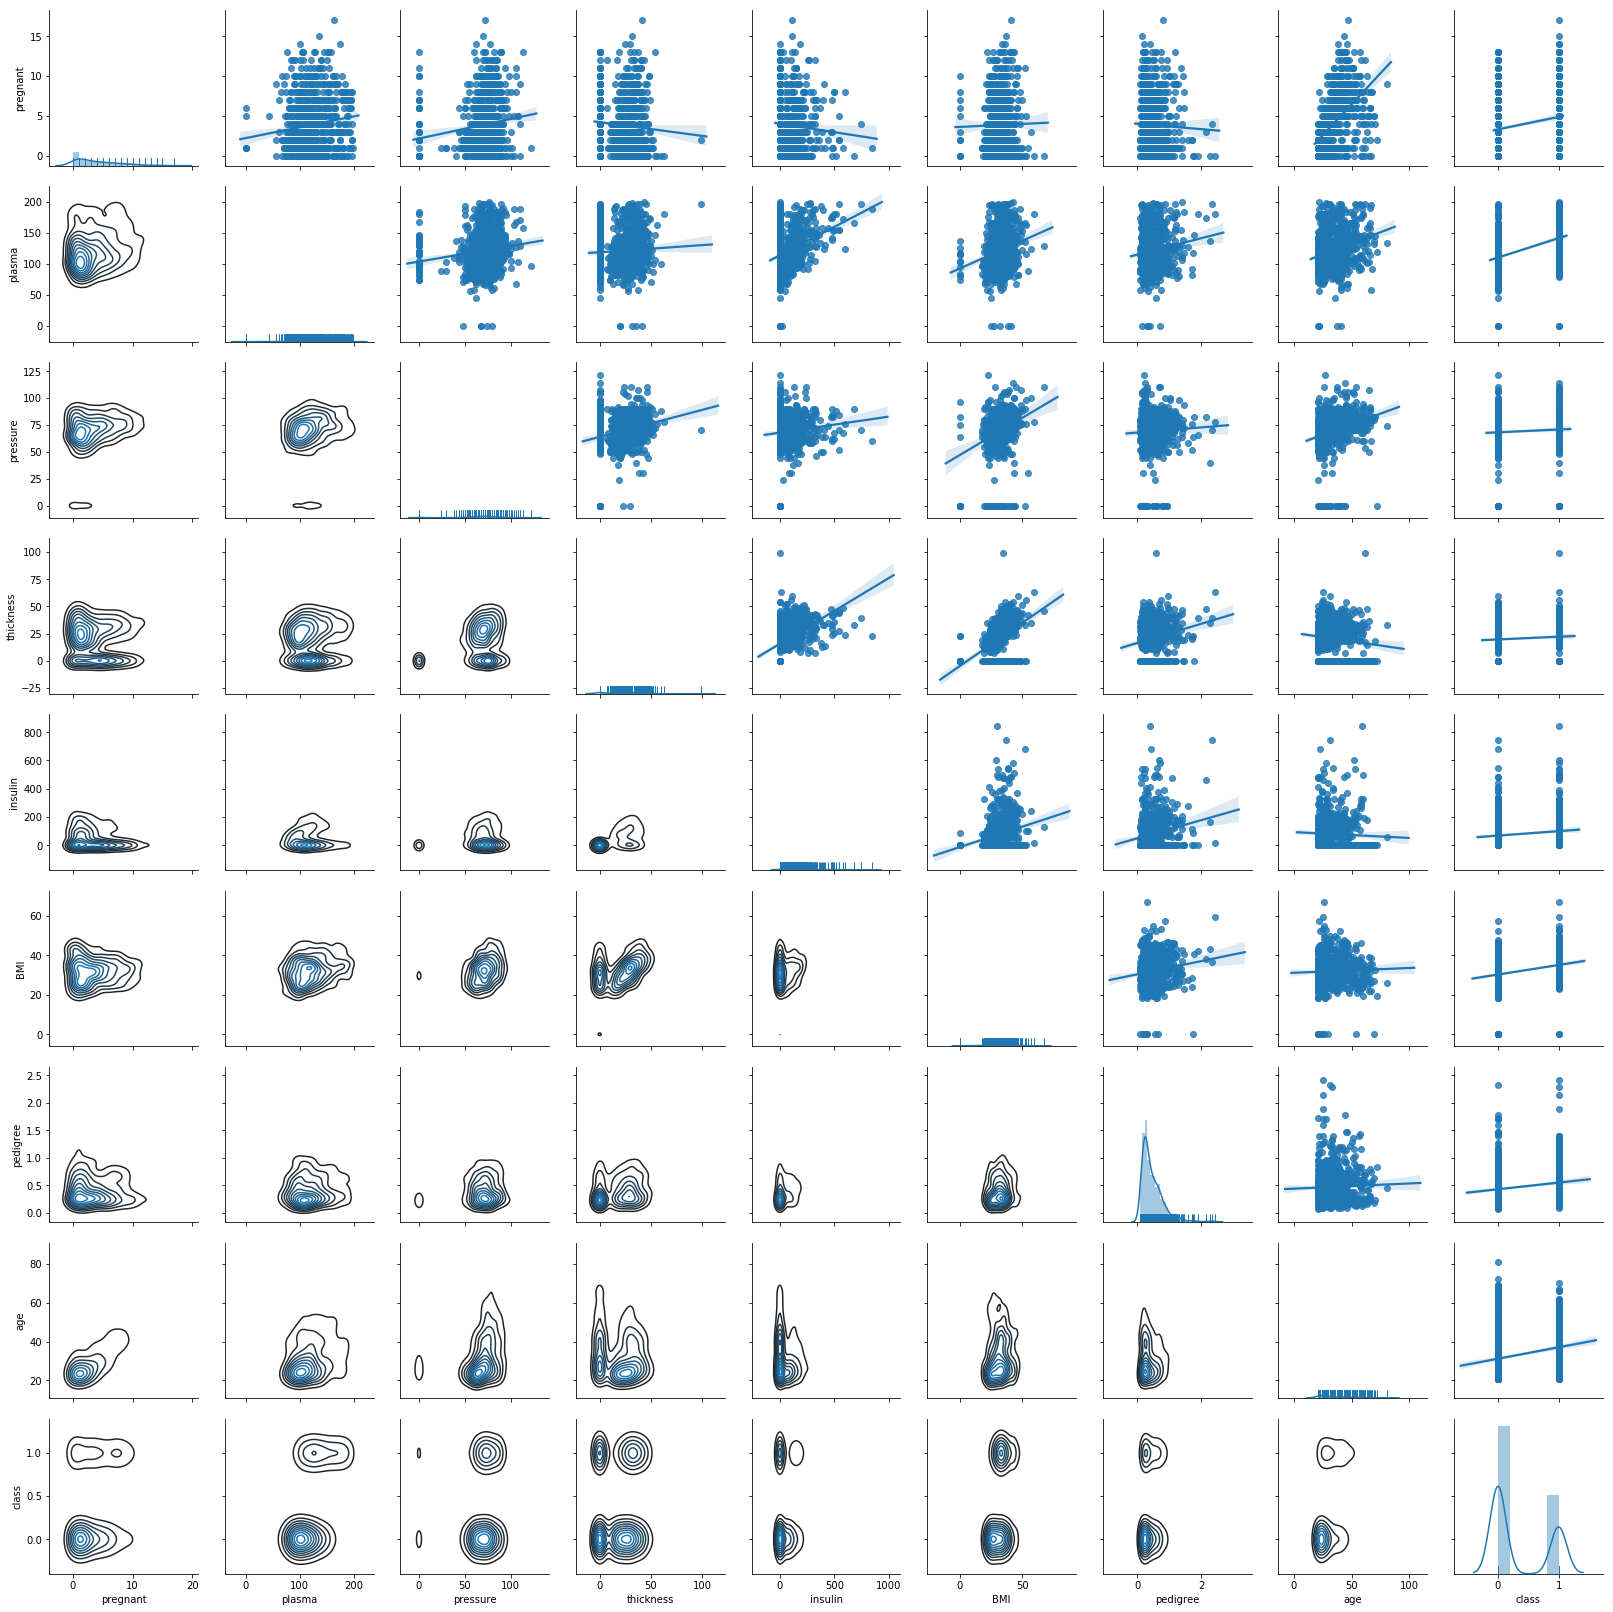

In [34]:
pair_grid = sns.PairGrid(df) 
pair_grid = pair_grid.map_upper(sns.regplot) 
pair_grid = pair_grid.map_lower(sns.kdeplot) 
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) 

# <font color = 'blue'>피처변수셋과 타겟변수 준비</font>

In [35]:
# 변수컬럼명 간단확인
df.head(3)

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### pandas 데이터프레임 & 시리즈 객체형식으로 준비

In [36]:
X = df.iloc[:, 0:8]
print(type(X), X.shape)
X.head(3)

<class 'pandas.core.frame.DataFrame'> (768, 8)


,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [37]:
y = df.iloc[:, 8]
print(type(y), y.shape)
y.head(3)

<class 'pandas.core.series.Series'> (768,)


0    1
1    0
2    1
Name: class, dtype: int64

### numpy 다차원 객체형식으로 준비

In [38]:
X_arr = df.values[:, 0:8]
print(type(X_arr), X_arr.shape)
X_arr[0:10]

<class 'numpy.ndarray'> (768, 8)


array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01,
        1.580e-01, 5.300e+01],
       [8.000e+00, 1.250e+02, 9.600e+01, 0.000e+00, 0.0

In [39]:
y_arr = df.values[:, 8]
print(type(y_arr), y_arr.shape)
y_arr[0:10]

<class 'numpy.ndarray'> (768,)


array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

### 타겟변수 클래스별 빈도와 비율 분포

In [40]:
# pandas이용 반응(종속)변수 클래스별 빈도수 도출
print('클래스 레이블:', pd.unique(df['class']))
print('클래스 빈도수:\n', pd.value_counts(df['class']))
print()
print('클래스 레이블:', df['class'].unique())
print('클래스 빈도수:\n', df['class'].value_counts())

클래스 레이블: [1 0]
클래스 빈도수:
 0    500
1    268
Name: class, dtype: int64

클래스 레이블: [1 0]
클래스 빈도수:
 0    500
1    268
Name: class, dtype: int64


In [41]:
target_labelcount = {k: v for k, v in zip(df['class'].unique(), df['class'].value_counts())}
target_labelcount
# - 클래스 유형별 빈도수 같이 출력

{0: 268, 1: 500}

In [42]:
print(type(target_labelcount))
print(target_labelcount.keys())
print(target_labelcount.values())
print(target_labelcount.items())
print()

for k, v in target_labelcount.items(): 
    pct = v / sum(target_labelcount.values()) 
    print(f"레이블: {k}, 빈도수: {v}, 비율: {pct:0.3f}") 

<class 'dict'>
dict_keys([1, 0])
dict_values([500, 268])
dict_items([(1, 500), (0, 268)])

레이블: 1, 빈도수: 500, 비율: 0.651
레이블: 0, 빈도수: 268, 비율: 0.349


### 타겟변수 숫자레이블 문자변환
* 딥러닝에서는 타겟변수가 문자열이 아닌 숫자로 변경해야 딥러닝 연산이 가능해짐
* 현재 타깃변수인 class에는 숫자 0, 1로 되어 있어서 그대로 사용가능함
* 이진분류에서 타겟변수가 숫자인 경우 0, 1로 되어 있으면 바로 사용가능함
* 만약 1, 2로 되어 있거나 3개 이상을 분류하는 다항분류의 경우에는 원핫인코딩이 필요함
* 1과 2로 되어있으면 2를 1보다 2배정도 performance가 좋다고 보는 경우가 많아서 0, 1로 변환함. 변환해주는 것을 '원핫인코딩'이라고 부름
* 원핫인코딩 1, 2 => 1:(1, 0), 2:(0, 1)
* 원핫인코딩 0, 1, 2 => 0:(1, 0, 0), 1:(0, 1, 0), 2:(0, 0, 1)
* 원핫인코딩 1, 2, 3 => 1:(1, 0, 0), 2:(0, 1, 0), 3:(0, 0, 1)

In [43]:
# 타겟변수 클래스 레이블 붙이기
df['class2'] = df['class'].map({1:'yes', 0:'no'})
df['class2'] = df['class2'].astype('category')
df.head(3)

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class,class2
0,6,148,72,35,0,33.6,0.627,50,1,yes
1,1,85,66,29,0,26.6,0.351,31,0,no
2,8,183,64,0,0,23.3,0.672,32,1,yes


In [44]:
# numpy이용 반응(종속)변수 클래스별 빈도수 도출
import numpy as np
print('클래스 레이블:', np.unique(df['class']))
print('클래스 레이블:', np.unique(df['class2']))
print('클래스 빈도수:', np.bincount(df['class']))

클래스 레이블: [0 1]
클래스 레이블: ['no' 'yes']
클래스 빈도수: [500 268]


# <font color = 'blue'>딥러닝 모델링</font>

### 딥러닝 라이브러리 로딩

In [45]:
# 딥러닝 관련 라이브러리
import tensorflow as tf
# - 딥러닝 학습알고리즘

from keras.models import Sequential
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있도록 해줌

from keras.layers import Dense
# - 딥러닝 학습계층별 노드/유닛을 밀집시켜 학습방법을 설정할 수 있도록 해줌

C:\anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 랜덤 시드넘버 설정

In [46]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

### 모델 훈련계층 설정
<img src = './../../images/md_pima_base.png'>

In [47]:
# 딥러닝 학습계층 시퀀스객체 로딩
md = Sequential()
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있는 Sequential()메서드를 md라는 객체로 로딩함

# 딥러닝 학습계층 설계
# - Dense() 객체로 학습계층별로 여러 개 노드가 밀집된 신경망을 구현함
# - 입력층(8개노드)-은닉층(12개노드)-은닉층(8개노드)-출력층(1개노드)

# 입력층(8개노드) + 은닉층(12개노드)
md.add(Dense(12, input_dim = 8, activation = 'relu'))
# - 딥러닝 학습계층 1번째로 input_dim 으로 입력층 + 은닉층 역할 수행
# - input_dim은 피처셋의 예측(입력;독립)변수 갯수로 입력층에 8개 노드로 지정
#   첫번째 레이어 이후로는 입력개수 지정 불필요
#   앞 레이어의 출력갯수가 이후 뒤 레이어의 입력개수가 됨
# - Dense 함수로 은닉층에 12개의 노드를 만듦
# - activation = 'relu'로 활성화함수 지정해 해당층의 학습결과를 다음층으로 넘김

# 은닉층(8개노드)
md.add(Dense(8, activation = 'relu'))
# - 딥러닝 학습계층 2번째로 은닉층 역할 수행
# - Dense 함수로 은닉층에 8개의 노드를 만듦
# - activation = 'relu'로 활성화함수 지정해 해당층의 학습결과를 다음층으로 넘김

# 출력층(1개노드)
md.add(Dense(1, activation = 'sigmoid'))
# - 딥러닝 학습계층 3번째로 출력층 역할
# - 출력값을 1개로 정해서 보여주기 위해서 1개 노드로 설정함
# - activation = 'sigmoid'로 활성화함수 지정해 
#   최종적인 출력값을 0 또는 1의 확률값으로 도출

### 모델 훈련방법 설정

In [48]:
# 준비된 학습계층의 학습방법 설정
md.compile(loss = 'binary_crossentropy', 
           optimizer = 'adam', metrics = ['accuracy'])

# - loss: 학습시 오차를 어떤방법으로 계산할지 설정
# - optimizser: 발생하는 오차를 어떤방법으로 줄여나갈지 설정 => 어떤걸 쓰냐에 따라 performance가 달라짐.
#   binary_crossentropy: 이항분류(binary-class classification)에 적합함
#   categorical_crossentropy: 다항분류(multi-class classification)에 적합함
# - metrics: 모형의 성능을 평가하는 기준으로 어떤 것을 사용할지 설정

### 모델 훈련실시

In [49]:
# 딥러닝 모델 최적화 훈련진행
# - 준비된 훈련계층과 훈련방법에 따라 미니배치(mini-batch) 방식으로 최적화 훈련진행
# - 훈련데이터셋을 한번에 투입해 또는 한개 샘플씩 학습을 하지 않고, 
#   일부(batch_size) 단위샘플로 나누어서 부분적으로 학습을 진행함
# - 미니배치를 하나씩 학습모델에 투입해 손실함수값을 줄이기 위한 파라미터(가중치, 편향)를 조율해 나감
# - 각 미니배치별 손실함수값을 구하고, 이들의 평균적인 오차와 정확도를 해당 모델의 성능으로 판단함
# - 또한 미니배치 단위샘플을 모두 사용하는 일련의 학습과정(에포크: epoch)을 
#   한번에 끝내는 것이 아니라 여러차례 반복실시해 모델의 성능을 개선해 나감    

md.fit(X, y, batch_size = 10, epochs = 200)
# - 훈련셋을 10개 샘플씩 나누어 미니배치를 여러개 만들고 
#   이를 모두 활용하는 딥러닝 학습을 총 200번 반복실시함

# - batch_size: 훈련데이터셋중에서 몇개 샘플을 미니배치(mini-batch)로 만들것인지 설정
#   적게설정: 빠른 훈련속도이점. 단위샘플셋에 따라 학습편차가 많이 발생. 병렬연산 못하고 하드웨어 자원낭비
#   많이설정: 훈련속도가 느려짐. 지역최소값(local minimum)에 빠질 수 있음. 하드웨어 자원에 부하가 많이 발생함)
# - epochs: 미니배치를 모두 처리하는 일련의 학습을 몇 번 정도 실시할지 설정
#   적게설정: 파라미터조율이 충분하지 않아서 과소적합 가능성
#   많이설정: 파라미터조율이 지나쳐 과대적합 가능성
#   한번의 사이클을 1 epochs라고 부름. 이걸 200번 반복시킨다는 의미.

# - 출력내용 중 
#   loss:훈련셋 오차, acc:훈런셋 정확도, 
#   ETA:estimated time of arrival
#   step: Weight와 Bias를 1회 업데이트하는 단위작업

Epoch 1/200
768/768 [==============================] - 1s 919us/step - loss: 2.4302 - acc: 0.5156
Epoch 2/200
768/768 [==============================] - 0s 167us/step - loss: 0.9143 - acc: 0.6393
Epoch 3/200
768/768 [==============================] - 0s 172us/step - loss: 0.7939 - acc: 0.6406
Epoch 4/200
768/768 [==============================] - 0s 146us/step - loss: 0.7408 - acc: 0.6068
Epoch 5/200
768/768 [==============================] - 0s 139us/step - loss: 0.6790 - acc: 0.6432
Epoch 6/200
768/768 [==============================] - 0s 155us/step - loss: 0.6498 - acc: 0.6263
Epoch 7/200
768/768 [==============================] - 0s 120us/step - loss: 0.6375 - acc: 0.6497
Epoch 8/200
768/768 [==============================] - 0s 122us/step - loss: 0.6390 - acc: 0.6289
Epoch 9/200
768/768 [==============================] - 0s 145us/step - loss: 0.6295 - acc: 0.6328 0s - loss: 0.6276 - acc: 0.635
Epoch 10/200
768/768 [==============================] - 0s 162us/step - loss: 0.6214 - 

768/768 [==============================] - 0s 149us/step - loss: 0.5284 - acc: 0.7318
Epoch 84/200
768/768 [==============================] - 0s 147us/step - loss: 0.5082 - acc: 0.7474
Epoch 85/200
768/768 [==============================] - 0s 154us/step - loss: 0.5108 - acc: 0.7396
Epoch 86/200
768/768 [==============================] - 0s 145us/step - loss: 0.5145 - acc: 0.7435
Epoch 87/200
768/768 [==============================] - 0s 154us/step - loss: 0.5137 - acc: 0.7474
Epoch 88/200
768/768 [==============================] - 0s 155us/step - loss: 0.5139 - acc: 0.7344
Epoch 89/200
768/768 [==============================] - 0s 150us/step - loss: 0.5079 - acc: 0.7578
Epoch 90/200
768/768 [==============================] - 0s 163us/step - loss: 0.5056 - acc: 0.7461
Epoch 91/200
768/768 [==============================] - 0s 177us/step - loss: 0.5030 - acc: 0.7552
Epoch 92/200
768/768 [==============================] - 0s 159us/step - loss: 0.5089 - acc: 0.7448
Epoch 93/200
768/768 [=

768/768 [==============================] - 0s 171us/step - loss: 0.4762 - acc: 0.7643
Epoch 166/200
768/768 [==============================] - 0s 152us/step - loss: 0.4764 - acc: 0.7682
Epoch 167/200
768/768 [==============================] - 0s 147us/step - loss: 0.4741 - acc: 0.7604
Epoch 168/200
768/768 [==============================] - 0s 159us/step - loss: 0.4654 - acc: 0.7708
Epoch 169/200
768/768 [==============================] - 0s 149us/step - loss: 0.4802 - acc: 0.7721
Epoch 170/200
768/768 [==============================] - 0s 151us/step - loss: 0.4714 - acc: 0.7786
Epoch 171/200
768/768 [==============================] - 0s 158us/step - loss: 0.4697 - acc: 0.7812
Epoch 172/200
768/768 [==============================] - 0s 151us/step - loss: 0.4710 - acc: 0.7773
Epoch 173/200
768/768 [==============================] - 0s 146us/step - loss: 0.4742 - acc: 0.7669
Epoch 174/200
768/768 [==============================] - 0s 167us/step - loss: 0.4677 - acc: 0.7917
Epoch 175/200


### 모델 성능평가

In [50]:
# 모델 성능평가: 오차(loss), 정확도(accuracy)
md_perf = md.evaluate(X, y)
md_perf

768/768 [==============================] - 0s 96us/step


[0.4724370775123437, 0.7890625]

In [51]:
# 모델 성능평가: 오차(loss)
print(md.evaluate(X, y)[0])
print(md_perf[0])

768/768 [==============================] - 0s 20us/step
0.4724370775123437
0.4724370775123437


In [52]:
# 3가지 타입의 모델성능 출력: 오차(loss)
print('loss: %.3f' % (md.evaluate(X, y)[0]))
print('loss: {:.3f}'.format(md.evaluate(X, y)[0]))
print(f'loss: {md.evaluate(X, y)[0]:.3f}')

768/768 [==============================] - 0s 22us/step
loss: 0.472
768/768 [==============================] - 0s 21us/step
loss: 0.472
768/768 [==============================] - 0s 23us/step
loss: 0.472


In [53]:
# 모델 성능평가: 정확도(accuracy)
print(md.evaluate(X, y)[1])
print(md_perf[1])

768/768 [==============================] - 0s 23us/step
0.7890625
0.7890625


In [54]:
# 3가지 타입의 모델성능 출력: 정확도(accuracy)
print('accuracy: %.3f' % (md.evaluate(X, y)[1]))
print('accuracy: {:.3f}'.format(md.evaluate(X, y)[1]))
print(f'accuracy: {md.evaluate(X, y)[1]:.3f}')

768/768 [==============================] - 0s 22us/step
accuracy: 0.789
768/768 [==============================] - 0s 33us/step
accuracy: 0.789
768/768 [==============================] - 0s 25us/step
accuracy: 0.789


In [55]:
md_perf = md.evaluate(X, y)

print('모델성능 종합:', [round(i, 3) for i in md_perf])
print(f'모델성능 오차(loss): {md_perf[0]:0.3f}')
print(f'모델성능 정확도(accuracy): {md_perf[1]:0.3f}')

768/768 [==============================] - 0s 22us/step
모델성능 종합: [0.472, 0.789]
모델성능 오차(loss): 0.472
모델성능 정확도(accuracy): 0.789


# <font color = 'blue'>딥러닝 모델 수정설정</font>

#### 딥러닝 모델계층 설정
* <font color = 'red'>md  모델</font>: 입력층(8개노드)-은닉층(12개노드)-은닉층(8개노드)-출력층(1개노드)
* <font color = 'red'>md2 모델</font>: 입력층(8개노드)-은닉층(12개노드)-은닉층(24개노드)-은닉층(8개노드)-출력층(1개노드)
* <font color = 'red'>md3 모델</font></font>: 입력층(8개노드)-은닉층(12개노드)-은닉층(8개노드)-출력층(1개노드)
* <font color = 'red'>md4 모델</font>: 입력층(8개노드)-은닉층(24개노드)-은닉층(12개노드)-은닉층(8개노드)-출력층(1개노드)

#### 딥러닝 학습방법 설정
* 모든모델 동일: md.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#### 딥러닝 모델에 데이터 피팅방법 설정
* md.fit(X, y, epochs = 200, batch_size = 10)
* md2.fit(X, y, epochs = 200, batch_size = 10)
* md3.fit(X, y, epochs = 1000, batch_size = 50)
* md4.fit(X, y, epochs = 2000, batch_size = 100)

### (1) 딥러닝 모델의 은닉층 갯수 또는 노드의 갯수 변화

#### 랜덤 시드넘버 설정

In [56]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

#### <font color = 'red'>(수정)</font>  모델 훈련계층 설정

In [57]:
# 기존모델
# - 입력층(8개노드)-은닉층(12개노드)-은닉층(8개노드)-출력층(1개노드)

# 신규모델
# - 입력층(8개노드)-은닉층(12개노드)-은닉층(24개노드)-은닉층(8개노드)-출력층(1개노드)

md2 = Sequential()

md2.add(Dense(12, input_dim = 8, activation = 'relu'))
md2.add(Dense(24, activation = 'relu'))
md2.add(Dense(8, activation = 'relu'))
md2.add(Dense(1, activation = 'sigmoid'))

#### (동일) 모델 훈련방법 설정

In [58]:
# 준비된 학습계층의 학습방법 설정
md2.compile(loss = 'binary_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])
# - 분류예측 중 이진 클래스 분류문제이므로 loss = 'binary_crossentropy'로 설정
# - 오류를 수정해 나가는 최적화 함수는 optimizer = 'adam'으로 설정
# - 훈련모델의 성능 평가메트릭은 metrics = ['accuracy'] 정확도로 설정

#### (동일) 모델 훈련실시

In [59]:
# 딥러닝 학습계층모델에 데이터 피팅
md2.fit(X, y, batch_size = 10, epochs = 200)
# - 훈련셋을 10개 샘플씩 나누어 미니배치를 여러개 만들고 
#   이를 모두 활용하는 딥러닝 학습을 총 200번 반복실시함

Epoch 1/200
768/768 [==============================] - 1s 722us/step - loss: 2.0099 - acc: 0.5638
Epoch 2/200
768/768 [==============================] - 0s 168us/step - loss: 0.7667 - acc: 0.6094
Epoch 3/200
768/768 [==============================] - 0s 168us/step - loss: 0.7032 - acc: 0.6224
Epoch 4/200
768/768 [==============================] - 0s 163us/step - loss: 0.6933 - acc: 0.6237
Epoch 5/200
768/768 [==============================] - 0s 175us/step - loss: 0.6719 - acc: 0.6432
Epoch 6/200
768/768 [==============================] - 0s 167us/step - loss: 0.6655 - acc: 0.6315
Epoch 7/200
768/768 [==============================] - 0s 163us/step - loss: 0.6542 - acc: 0.6628
Epoch 8/200
768/768 [==============================] - 0s 168us/step - loss: 0.6497 - acc: 0.6328
Epoch 9/200
768/768 [==============================] - 0s 192us/step - loss: 0.6346 - acc: 0.6602
Epoch 10/200
768/768 [==============================] - 0s 180us/step - loss: 0.6259 - acc: 0.6693
Epoch 11/200
768/76

768/768 [==============================] - 0s 159us/step - loss: 0.4939 - acc: 0.7552
Epoch 84/200
768/768 [==============================] - 0s 167us/step - loss: 0.4833 - acc: 0.7578
Epoch 85/200
768/768 [==============================] - 0s 160us/step - loss: 0.4780 - acc: 0.7773
Epoch 86/200
768/768 [==============================] - 0s 167us/step - loss: 0.4773 - acc: 0.7760
Epoch 87/200
768/768 [==============================] - 0s 186us/step - loss: 0.4925 - acc: 0.7604
Epoch 88/200
768/768 [==============================] - 0s 172us/step - loss: 0.4818 - acc: 0.7773
Epoch 89/200
768/768 [==============================] - 0s 171us/step - loss: 0.4830 - acc: 0.7799
Epoch 90/200
768/768 [==============================] - 0s 186us/step - loss: 0.4803 - acc: 0.7695
Epoch 91/200
768/768 [==============================] - 0s 186us/step - loss: 0.4771 - acc: 0.7695
Epoch 92/200
768/768 [==============================] - 0s 175us/step - loss: 0.4863 - acc: 0.7604
Epoch 93/200
768/768 [=

768/768 [==============================] - 0s 188us/step - loss: 0.4330 - acc: 0.7956
Epoch 165/200
768/768 [==============================] - 0s 162us/step - loss: 0.4512 - acc: 0.7826
Epoch 166/200
768/768 [==============================] - 0s 173us/step - loss: 0.4379 - acc: 0.7969
Epoch 167/200
768/768 [==============================] - 0s 162us/step - loss: 0.4453 - acc: 0.7878
Epoch 168/200
768/768 [==============================] - 0s 163us/step - loss: 0.4424 - acc: 0.7943
Epoch 169/200
768/768 [==============================] - 0s 164us/step - loss: 0.4458 - acc: 0.7812
Epoch 170/200
768/768 [==============================] - 0s 168us/step - loss: 0.4361 - acc: 0.7969
Epoch 171/200
768/768 [==============================] - 0s 163us/step - loss: 0.4383 - acc: 0.7826
Epoch 172/200
768/768 [==============================] - 0s 179us/step - loss: 0.4404 - acc: 0.7839
Epoch 173/200
768/768 [==============================] - 0s 180us/step - loss: 0.4366 - acc: 0.7812
Epoch 174/200


#### 모델 성능평가

In [60]:
md2_perf = md2.evaluate(X, y)

print('모델성능 종합:', [round(i, 3) for i in md2_perf])
print(f'모델성능 오차(loss): {md2_perf[0]:0.3f}')
print(f'모델성능 정확도(accuracy): {md2_perf[1]:0.3f}')

768/768 [==============================] - 0s 126us/step
모델성능 종합: [0.427, 0.807]
모델성능 오차(loss): 0.427
모델성능 정확도(accuracy): 0.807


### (2) 딥러닝 모델의 피팅방법 변화

#### 랜덤 시드넘버 설정

In [61]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

#### (동일) 모델 훈련계층 설정

In [62]:
# 기존모델
# - 입력층(8개노드)-은닉층(12개노드)-은닉층(8개노드)-출력층(1개노드)

md3 = Sequential()

md3.add(Dense(12, input_dim = 8, activation = 'relu'))
md3.add(Dense(8, activation = 'relu'))
md3.add(Dense(1, activation = 'sigmoid'))

#### (동일) 모델 훈련방법 설정

In [63]:
# 준비된 학습계층의 학습방법 설정
md3.compile(loss = 'binary_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])
# - 분류예측 중 이진 클래스 분류문제이므로 loss = 'binary_crossentropy'로 설정
# - 오류를 수정해 나가는 최적화 함수는 optimizer = 'adam'으로 설정
# - 훈련모델의 성능 평가메트릭은 metrics = ['accuracy'] 정확도로 설정

#### <font color = 'red'>(수정)</font>  모델 훈련실시

In [64]:
# 딥러닝 학습계층모델에 데이터 피팅

# 기존 피팅방법
# md.fit(X, y, epochs = 200, batch_size = 10)

# 수정된 피팅방법
md3.fit(X, y, batch_size = 50, epochs = 1000)
# - 훈련셋을 50개 샘플씩 나누어 미니배치를 여러개 만들고 
#   이를 모두 활용하는 딥러닝 학습을 총 1000번 반복실시함

Epoch 1/1000
768/768 [==============================] - 0s 567us/step - loss: 4.6608 - acc: 0.3971
Epoch 2/1000
768/768 [==============================] - 0s 35us/step - loss: 2.6185 - acc: 0.4635
Epoch 3/1000
768/768 [==============================] - 0s 36us/step - loss: 1.4810 - acc: 0.5534
Epoch 4/1000
768/768 [==============================] - 0s 38us/step - loss: 1.0998 - acc: 0.6406
Epoch 5/1000
768/768 [==============================] - 0s 43us/step - loss: 0.9961 - acc: 0.6484
Epoch 6/1000
768/768 [==============================] - 0s 38us/step - loss: 0.9076 - acc: 0.6302
Epoch 7/1000
768/768 [==============================] - 0s 39us/step - loss: 0.8507 - acc: 0.6406
Epoch 8/1000
768/768 [==============================] - 0s 42us/step - loss: 0.8171 - acc: 0.6510
Epoch 9/1000
768/768 [==============================] - 0s 55us/step - loss: 0.7917 - acc: 0.6510
Epoch 10/1000
768/768 [==============================] - 0s 42us/step - loss: 0.7599 - acc: 0.6497
Epoch 11/1000
768/

768/768 [==============================] - 0s 34us/step - loss: 0.5576 - acc: 0.7292
Epoch 84/1000
768/768 [==============================] - 0s 39us/step - loss: 0.5481 - acc: 0.7187
Epoch 85/1000
768/768 [==============================] - 0s 38us/step - loss: 0.5656 - acc: 0.7227
Epoch 86/1000
768/768 [==============================] - 0s 36us/step - loss: 0.5426 - acc: 0.7227
Epoch 87/1000
768/768 [==============================] - 0s 38us/step - loss: 0.5439 - acc: 0.7266
Epoch 88/1000
768/768 [==============================] - 0s 43us/step - loss: 0.5427 - acc: 0.7214
Epoch 89/1000
768/768 [==============================] - 0s 33us/step - loss: 0.5437 - acc: 0.7161
Epoch 90/1000
768/768 [==============================] - 0s 40us/step - loss: 0.5492 - acc: 0.7305
Epoch 91/1000
768/768 [==============================] - 0s 35us/step - loss: 0.5408 - acc: 0.7122
Epoch 92/1000
768/768 [==============================] - 0s 39us/step - loss: 0.5470 - acc: 0.7214
Epoch 93/1000
768/768 [=

768/768 [==============================] - 0s 33us/step - loss: 0.5077 - acc: 0.7461
Epoch 165/1000
768/768 [==============================] - 0s 35us/step - loss: 0.5164 - acc: 0.7383
Epoch 166/1000
768/768 [==============================] - 0s 36us/step - loss: 0.5134 - acc: 0.7422
Epoch 167/1000
768/768 [==============================] - 0s 38us/step - loss: 0.5098 - acc: 0.7474
Epoch 168/1000
768/768 [==============================] - 0s 38us/step - loss: 0.5114 - acc: 0.7500
Epoch 169/1000
768/768 [==============================] - 0s 38us/step - loss: 0.5112 - acc: 0.7422
Epoch 170/1000
768/768 [==============================] - 0s 40us/step - loss: 0.5055 - acc: 0.7487
Epoch 171/1000
768/768 [==============================] - 0s 35us/step - loss: 0.5117 - acc: 0.7344
Epoch 172/1000
768/768 [==============================] - 0s 39us/step - loss: 0.5081 - acc: 0.7526
Epoch 173/1000
768/768 [==============================] - 0s 36us/step - loss: 0.5050 - acc: 0.7552
Epoch 174/1000


768/768 [==============================] - 0s 39us/step - loss: 0.4908 - acc: 0.7578
Epoch 246/1000
768/768 [==============================] - 0s 35us/step - loss: 0.4913 - acc: 0.7630
Epoch 247/1000
768/768 [==============================] - 0s 40us/step - loss: 0.4859 - acc: 0.7656
Epoch 248/1000
768/768 [==============================] - 0s 35us/step - loss: 0.4881 - acc: 0.7617
Epoch 249/1000
768/768 [==============================] - 0s 34us/step - loss: 0.4895 - acc: 0.7656
Epoch 250/1000
768/768 [==============================] - 0s 35us/step - loss: 0.4851 - acc: 0.7578
Epoch 251/1000
768/768 [==============================] - 0s 38us/step - loss: 0.5062 - acc: 0.7656
Epoch 252/1000
768/768 [==============================] - 0s 36us/step - loss: 0.5022 - acc: 0.7669
Epoch 253/1000
768/768 [==============================] - 0s 43us/step - loss: 0.4894 - acc: 0.7578
Epoch 254/1000
768/768 [==============================] - 0s 38us/step - loss: 0.4901 - acc: 0.7604
Epoch 255/1000


768/768 [==============================] - 0s 42us/step - loss: 0.4779 - acc: 0.7773
Epoch 328/1000
768/768 [==============================] - 0s 39us/step - loss: 0.4866 - acc: 0.7747
Epoch 329/1000
768/768 [==============================] - 0s 43us/step - loss: 0.4713 - acc: 0.7773
Epoch 330/1000
768/768 [==============================] - 0s 39us/step - loss: 0.4749 - acc: 0.7695
Epoch 331/1000
768/768 [==============================] - 0s 35us/step - loss: 0.4812 - acc: 0.7630
Epoch 332/1000
768/768 [==============================] - 0s 40us/step - loss: 0.4688 - acc: 0.7826
Epoch 333/1000
768/768 [==============================] - 0s 35us/step - loss: 0.4754 - acc: 0.7656
Epoch 334/1000
768/768 [==============================] - 0s 40us/step - loss: 0.4785 - acc: 0.7643
Epoch 335/1000
768/768 [==============================] - 0s 38us/step - loss: 0.4767 - acc: 0.7682
Epoch 336/1000
768/768 [==============================] - 0s 38us/step - loss: 0.4698 - acc: 0.7695
Epoch 337/1000


768/768 [==============================] - 0s 35us/step - loss: 0.4594 - acc: 0.7786
Epoch 409/1000
768/768 [==============================] - 0s 39us/step - loss: 0.4558 - acc: 0.7813
Epoch 410/1000
768/768 [==============================] - 0s 35us/step - loss: 0.4582 - acc: 0.7799
Epoch 411/1000
768/768 [==============================] - 0s 34us/step - loss: 0.4595 - acc: 0.7682
Epoch 412/1000
768/768 [==============================] - 0s 36us/step - loss: 0.4628 - acc: 0.7630
Epoch 413/1000
768/768 [==============================] - 0s 39us/step - loss: 0.4616 - acc: 0.7799
Epoch 414/1000
768/768 [==============================] - 0s 38us/step - loss: 0.4585 - acc: 0.7812
Epoch 415/1000
768/768 [==============================] - 0s 40us/step - loss: 0.4783 - acc: 0.7617
Epoch 416/1000
768/768 [==============================] - 0s 35us/step - loss: 0.4814 - acc: 0.7591
Epoch 417/1000
768/768 [==============================] - 0s 42us/step - loss: 0.4628 - acc: 0.7773
Epoch 418/1000


768/768 [==============================] - 0s 36us/step - loss: 0.4558 - acc: 0.7786
Epoch 490/1000
768/768 [==============================] - 0s 38us/step - loss: 0.4608 - acc: 0.7826
Epoch 491/1000
768/768 [==============================] - 0s 39us/step - loss: 0.4595 - acc: 0.7891
Epoch 492/1000
768/768 [==============================] - 0s 35us/step - loss: 0.4500 - acc: 0.7852
Epoch 493/1000
768/768 [==============================] - 0s 38us/step - loss: 0.4510 - acc: 0.7747
Epoch 494/1000
768/768 [==============================] - 0s 34us/step - loss: 0.4532 - acc: 0.7865
Epoch 495/1000
768/768 [==============================] - 0s 40us/step - loss: 0.4504 - acc: 0.7865
Epoch 496/1000
768/768 [==============================] - 0s 38us/step - loss: 0.4453 - acc: 0.7891
Epoch 497/1000
768/768 [==============================] - 0s 40us/step - loss: 0.4553 - acc: 0.7865
Epoch 498/1000
768/768 [==============================] - 0s 36us/step - loss: 0.4587 - acc: 0.7760
Epoch 499/1000


768/768 [==============================] - 0s 46us/step - loss: 0.4421 - acc: 0.7891
Epoch 571/1000
768/768 [==============================] - 0s 44us/step - loss: 0.4487 - acc: 0.7799
Epoch 572/1000
768/768 [==============================] - 0s 40us/step - loss: 0.4461 - acc: 0.7943
Epoch 573/1000
768/768 [==============================] - 0s 38us/step - loss: 0.4538 - acc: 0.7917
Epoch 574/1000
768/768 [==============================] - 0s 44us/step - loss: 0.4518 - acc: 0.7786
Epoch 575/1000
768/768 [==============================] - 0s 44us/step - loss: 0.4512 - acc: 0.7799
Epoch 576/1000
768/768 [==============================] - 0s 39us/step - loss: 0.4459 - acc: 0.7852
Epoch 577/1000
768/768 [==============================] - 0s 42us/step - loss: 0.4578 - acc: 0.7799
Epoch 578/1000
768/768 [==============================] - 0s 42us/step - loss: 0.4464 - acc: 0.7865
Epoch 579/1000
768/768 [==============================] - 0s 36us/step - loss: 0.4451 - acc: 0.7917
Epoch 580/1000


768/768 [==============================] - 0s 35us/step - loss: 0.4416 - acc: 0.7891
Epoch 653/1000
768/768 [==============================] - 0s 35us/step - loss: 0.4393 - acc: 0.7943
Epoch 654/1000
768/768 [==============================] - 0s 36us/step - loss: 0.4457 - acc: 0.7878
Epoch 655/1000
768/768 [==============================] - 0s 35us/step - loss: 0.4558 - acc: 0.7773
Epoch 656/1000
768/768 [==============================] - 0s 40us/step - loss: 0.4630 - acc: 0.7760
Epoch 657/1000
768/768 [==============================] - 0s 36us/step - loss: 0.4468 - acc: 0.7878
Epoch 658/1000
768/768 [==============================] - 0s 42us/step - loss: 0.4442 - acc: 0.7878
Epoch 659/1000
768/768 [==============================] - 0s 38us/step - loss: 0.4389 - acc: 0.7878
Epoch 660/1000
768/768 [==============================] - 0s 39us/step - loss: 0.4390 - acc: 0.7956
Epoch 661/1000
768/768 [==============================] - 0s 38us/step - loss: 0.4425 - acc: 0.7878
Epoch 662/1000


768/768 [==============================] - 0s 38us/step - loss: 0.4417 - acc: 0.8008
Epoch 735/1000
768/768 [==============================] - 0s 36us/step - loss: 0.4456 - acc: 0.7865
Epoch 736/1000
768/768 [==============================] - 0s 34us/step - loss: 0.4393 - acc: 0.7930
Epoch 737/1000
768/768 [==============================] - 0s 39us/step - loss: 0.4395 - acc: 0.7865
Epoch 738/1000
768/768 [==============================] - 0s 38us/step - loss: 0.4373 - acc: 0.8034
Epoch 739/1000
768/768 [==============================] - 0s 34us/step - loss: 0.4383 - acc: 0.7878
Epoch 740/1000
768/768 [==============================] - 0s 35us/step - loss: 0.4388 - acc: 0.7917
Epoch 741/1000
768/768 [==============================] - 0s 39us/step - loss: 0.4390 - acc: 0.7917
Epoch 742/1000
768/768 [==============================] - 0s 35us/step - loss: 0.4395 - acc: 0.7917
Epoch 743/1000
768/768 [==============================] - 0s 44us/step - loss: 0.4341 - acc: 0.7969
Epoch 744/1000


768/768 [==============================] - 0s 40us/step - loss: 0.4333 - acc: 0.7917
Epoch 817/1000
768/768 [==============================] - 0s 38us/step - loss: 0.4339 - acc: 0.7982
Epoch 818/1000
768/768 [==============================] - 0s 36us/step - loss: 0.4309 - acc: 0.7917
Epoch 819/1000
768/768 [==============================] - 0s 43us/step - loss: 0.4417 - acc: 0.7826
Epoch 820/1000
768/768 [==============================] - 0s 40us/step - loss: 0.4417 - acc: 0.7982
Epoch 821/1000
768/768 [==============================] - 0s 43us/step - loss: 0.4318 - acc: 0.7995
Epoch 822/1000
768/768 [==============================] - 0s 40us/step - loss: 0.4472 - acc: 0.7982
Epoch 823/1000
768/768 [==============================] - 0s 43us/step - loss: 0.4410 - acc: 0.7930
Epoch 824/1000
768/768 [==============================] - 0s 38us/step - loss: 0.4294 - acc: 0.8034
Epoch 825/1000
768/768 [==============================] - 0s 46us/step - loss: 0.4383 - acc: 0.7943
Epoch 826/1000


768/768 [==============================] - 0s 34us/step - loss: 0.4310 - acc: 0.7930
Epoch 898/1000
768/768 [==============================] - 0s 43us/step - loss: 0.4369 - acc: 0.7852
Epoch 899/1000
768/768 [==============================] - 0s 33us/step - loss: 0.4331 - acc: 0.7969
Epoch 900/1000
768/768 [==============================] - 0s 42us/step - loss: 0.4405 - acc: 0.7930
Epoch 901/1000
768/768 [==============================] - 0s 34us/step - loss: 0.4348 - acc: 0.7904
Epoch 902/1000
768/768 [==============================] - 0s 40us/step - loss: 0.4418 - acc: 0.7904
Epoch 903/1000
768/768 [==============================] - 0s 38us/step - loss: 0.4452 - acc: 0.7904
Epoch 904/1000
768/768 [==============================] - 0s 43us/step - loss: 0.4393 - acc: 0.7891
Epoch 905/1000
768/768 [==============================] - 0s 36us/step - loss: 0.4354 - acc: 0.7904
Epoch 906/1000
768/768 [==============================] - 0s 36us/step - loss: 0.4390 - acc: 0.7852
Epoch 907/1000


768/768 [==============================] - 0s 42us/step - loss: 0.4319 - acc: 0.7943
Epoch 979/1000
768/768 [==============================] - 0s 39us/step - loss: 0.4298 - acc: 0.7930
Epoch 980/1000
768/768 [==============================] - 0s 40us/step - loss: 0.4383 - acc: 0.7969
Epoch 981/1000
768/768 [==============================] - 0s 43us/step - loss: 0.4348 - acc: 0.7982
Epoch 982/1000
768/768 [==============================] - 0s 43us/step - loss: 0.4279 - acc: 0.7943
Epoch 983/1000
768/768 [==============================] - 0s 40us/step - loss: 0.4419 - acc: 0.8021
Epoch 984/1000
768/768 [==============================] - 0s 39us/step - loss: 0.4377 - acc: 0.7891
Epoch 985/1000
768/768 [==============================] - 0s 44us/step - loss: 0.4356 - acc: 0.7943
Epoch 986/1000
768/768 [==============================] - 0s 40us/step - loss: 0.4305 - acc: 0.7917
Epoch 987/1000
768/768 [==============================] - 0s 44us/step - loss: 0.4307 - acc: 0.7930
Epoch 988/1000


#### 모델 성능평가

In [65]:
md3_perf = md3.evaluate(X, y)

print('모델성능 종합:', [round(i, 3) for i in md3_perf])
print(f'모델성능 오차(loss): {md3_perf[0]:0.3f}')
print(f'모델성능 정확도(accuracy): {md3_perf[1]:0.3f}')

768/768 [==============================] - 0s 163us/step
모델성능 종합: [0.425, 0.801]
모델성능 오차(loss): 0.425
모델성능 정확도(accuracy): 0.801


### (3) 딥러닝 모델의 은닉층/노드 갯수 & 피팅방법 변화

#### 랜덤 시드넘버 설정

In [66]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

#### <font color = 'red'>(수정)</font>  모델 훈련계층 설정

In [67]:
# 기존모델
# - 입력층(8개노드)-은닉층(12개노드)-은닉층(8개노드)-출력층(1개노드)

# 신규모델
# - 입력층(8개노드)-은닉층(24개노드)-은닉층(12개노드)-은닉층(8개노드)-출력층(1개노드)

md4 = Sequential()

md4.add(Dense(24, input_dim = 8, activation = 'relu'))
md4.add(Dense(12, activation = 'relu'))
md4.add(Dense(8, activation = 'relu'))
md4.add(Dense(1, activation = 'sigmoid'))

#### (동일) 모델 훈련 설정

In [68]:
# 준비된 학습계층의 학습방법 설정
md4.compile(loss = 'binary_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])
# - 분류예측 중 이진 클래스 분류문제이므로 loss = 'binary_crossentropy'로 설정
# - 오류를 수정해 나가는 최적화 함수는 optimizer = 'adam'으로 설정
# - 훈련모델의 성능 평가메트릭은 metrics = ['accuracy'] 정확도로 설정

#### <font color = 'red'>(수정)</font> 모델 훈련실시

In [69]:
# 딥러닝 학습계층모델에 데이터 피팅

# 기존 피팅방법
# md.fit(X, y, epochs = 2000, batch_size = 100)

# 수정된 피팅방법
md4.fit(X, y, batch_size = 100, epochs = 2000)
# - 훈련셋을 100개 샘플씩 나누어 미니배치를 여러개 만들고 
#   이를 모두 활용하는 딥러닝 학습을 총 2000번 반복실시함

Epoch 1/2000
768/768 [==============================] - 1s 1ms/step - loss: 2.8187 - acc: 0.6510
Epoch 2/2000
768/768 [==============================] - 0s 27us/step - loss: 1.5220 - acc: 0.6497
Epoch 3/2000
768/768 [==============================] - 0s 26us/step - loss: 0.9410 - acc: 0.6458
Epoch 4/2000
768/768 [==============================] - 0s 26us/step - loss: 0.7339 - acc: 0.6393
Epoch 5/2000
768/768 [==============================] - 0s 25us/step - loss: 0.7032 - acc: 0.5898
Epoch 6/2000
768/768 [==============================] - 0s 25us/step - loss: 0.7089 - acc: 0.5482
Epoch 7/2000
768/768 [==============================] - 0s 30us/step - loss: 0.6950 - acc: 0.5977
Epoch 8/2000
768/768 [==============================] - 0s 31us/step - loss: 0.6872 - acc: 0.6510
Epoch 9/2000
768/768 [==============================] - 0s 26us/step - loss: 0.6857 - acc: 0.6484
Epoch 10/2000
768/768 [==============================] - 0s 25us/step - loss: 0.6824 - acc: 0.6510
Epoch 11/2000
768/76

768/768 [==============================] - 0s 27us/step - loss: 0.5675 - acc: 0.7174
Epoch 84/2000
768/768 [==============================] - 0s 26us/step - loss: 0.5699 - acc: 0.7135
Epoch 85/2000
768/768 [==============================] - 0s 29us/step - loss: 0.5722 - acc: 0.7161
Epoch 86/2000
768/768 [==============================] - 0s 29us/step - loss: 0.5649 - acc: 0.7214
Epoch 87/2000
768/768 [==============================] - 0s 27us/step - loss: 0.5630 - acc: 0.7227
Epoch 88/2000
768/768 [==============================] - 0s 26us/step - loss: 0.5655 - acc: 0.7161
Epoch 89/2000
768/768 [==============================] - 0s 26us/step - loss: 0.5620 - acc: 0.7253
Epoch 90/2000
768/768 [==============================] - 0s 27us/step - loss: 0.5595 - acc: 0.7148
Epoch 91/2000
768/768 [==============================] - 0s 25us/step - loss: 0.5588 - acc: 0.7253
Epoch 92/2000
768/768 [==============================] - 0s 38us/step - loss: 0.5587 - acc: 0.7214
Epoch 93/2000
768/768 [=

768/768 [==============================] - 0s 22us/step - loss: 0.5103 - acc: 0.7630
Epoch 165/2000
768/768 [==============================] - 0s 23us/step - loss: 0.5079 - acc: 0.7682
Epoch 166/2000
768/768 [==============================] - 0s 25us/step - loss: 0.5094 - acc: 0.7617
Epoch 167/2000
768/768 [==============================] - 0s 23us/step - loss: 0.5094 - acc: 0.7578
Epoch 168/2000
768/768 [==============================] - 0s 25us/step - loss: 0.5114 - acc: 0.7630
Epoch 169/2000
768/768 [==============================] - 0s 25us/step - loss: 0.5115 - acc: 0.7617
Epoch 170/2000
768/768 [==============================] - 0s 22us/step - loss: 0.5092 - acc: 0.7682
Epoch 171/2000
768/768 [==============================] - 0s 23us/step - loss: 0.5077 - acc: 0.7578
Epoch 172/2000
768/768 [==============================] - 0s 27us/step - loss: 0.5078 - acc: 0.7630
Epoch 173/2000
768/768 [==============================] - 0s 25us/step - loss: 0.5076 - acc: 0.7591
Epoch 174/2000


768/768 [==============================] - 0s 26us/step - loss: 0.4880 - acc: 0.7773
Epoch 247/2000
768/768 [==============================] - 0s 27us/step - loss: 0.4841 - acc: 0.7734
Epoch 248/2000
768/768 [==============================] - 0s 27us/step - loss: 0.4836 - acc: 0.7721
Epoch 249/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4872 - acc: 0.7630
Epoch 250/2000
768/768 [==============================] - 0s 27us/step - loss: 0.4914 - acc: 0.7617
Epoch 251/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4837 - acc: 0.7786
Epoch 252/2000
768/768 [==============================] - 0s 22us/step - loss: 0.4869 - acc: 0.7773
Epoch 253/2000
768/768 [==============================] - 0s 25us/step - loss: 0.4865 - acc: 0.7682
Epoch 254/2000
768/768 [==============================] - 0s 25us/step - loss: 0.4840 - acc: 0.7760
Epoch 255/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4852 - acc: 0.7721
Epoch 256/2000


768/768 [==============================] - 0s 23us/step - loss: 0.4705 - acc: 0.7826
Epoch 329/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4725 - acc: 0.7773
Epoch 330/2000
768/768 [==============================] - 0s 22us/step - loss: 0.4743 - acc: 0.7826
Epoch 331/2000
768/768 [==============================] - 0s 21us/step - loss: 0.4780 - acc: 0.7695
Epoch 332/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4813 - acc: 0.7695
Epoch 333/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4716 - acc: 0.7747
Epoch 334/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4724 - acc: 0.7799
Epoch 335/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4700 - acc: 0.7760
Epoch 336/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4688 - acc: 0.7812
Epoch 337/2000
768/768 [==============================] - 0s 26us/step - loss: 0.4654 - acc: 0.7839
Epoch 338/2000


768/768 [==============================] - 0s 22us/step - loss: 0.4532 - acc: 0.7865
Epoch 410/2000
768/768 [==============================] - 0s 26us/step - loss: 0.4542 - acc: 0.7852
Epoch 411/2000
768/768 [==============================] - 0s 25us/step - loss: 0.4564 - acc: 0.7786
Epoch 412/2000
768/768 [==============================] - 0s 22us/step - loss: 0.4589 - acc: 0.7786
Epoch 413/2000
768/768 [==============================] - 0s 22us/step - loss: 0.4550 - acc: 0.7865
Epoch 414/2000
768/768 [==============================] - 0s 22us/step - loss: 0.4530 - acc: 0.7891
Epoch 415/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4539 - acc: 0.7891
Epoch 416/2000
768/768 [==============================] - 0s 25us/step - loss: 0.4546 - acc: 0.7878
Epoch 417/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4567 - acc: 0.7891
Epoch 418/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4534 - acc: 0.7865
Epoch 419/2000


768/768 [==============================] - 0s 23us/step - loss: 0.4450 - acc: 0.7904
Epoch 492/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4421 - acc: 0.7839
Epoch 493/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4436 - acc: 0.7956
Epoch 494/2000
768/768 [==============================] - 0s 25us/step - loss: 0.4411 - acc: 0.7943
Epoch 495/2000
768/768 [==============================] - 0s 29us/step - loss: 0.4444 - acc: 0.7930
Epoch 496/2000
768/768 [==============================] - 0s 22us/step - loss: 0.4444 - acc: 0.7865
Epoch 497/2000
768/768 [==============================] - 0s 22us/step - loss: 0.4414 - acc: 0.7904
Epoch 498/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4408 - acc: 0.7917
Epoch 499/2000
768/768 [==============================] - 0s 22us/step - loss: 0.4438 - acc: 0.7917
Epoch 500/2000
768/768 [==============================] - 0s 25us/step - loss: 0.4522 - acc: 0.7747
Epoch 501/2000


768/768 [==============================] - 0s 23us/step - loss: 0.4435 - acc: 0.7839
Epoch 574/2000
768/768 [==============================] - 0s 27us/step - loss: 0.4395 - acc: 0.7943
Epoch 575/2000
768/768 [==============================] - 0s 25us/step - loss: 0.4376 - acc: 0.7917
Epoch 576/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4315 - acc: 0.7943
Epoch 577/2000
768/768 [==============================] - 0s 26us/step - loss: 0.4321 - acc: 0.7969
Epoch 578/2000
768/768 [==============================] - 0s 27us/step - loss: 0.4318 - acc: 0.7943
Epoch 579/2000
768/768 [==============================] - 0s 27us/step - loss: 0.4307 - acc: 0.7995
Epoch 580/2000
768/768 [==============================] - 0s 29us/step - loss: 0.4289 - acc: 0.7943
Epoch 581/2000
768/768 [==============================] - 0s 26us/step - loss: 0.4378 - acc: 0.7799
Epoch 582/2000
768/768 [==============================] - 0s 26us/step - loss: 0.4329 - acc: 0.7943
Epoch 583/2000


768/768 [==============================] - 0s 26us/step - loss: 0.4258 - acc: 0.8008
Epoch 655/2000
768/768 [==============================] - 0s 25us/step - loss: 0.4222 - acc: 0.8047
Epoch 656/2000
768/768 [==============================] - 0s 34us/step - loss: 0.4241 - acc: 0.7969
Epoch 657/2000
768/768 [==============================] - 0s 26us/step - loss: 0.4218 - acc: 0.8047
Epoch 658/2000
768/768 [==============================] - 0s 29us/step - loss: 0.4223 - acc: 0.7956
Epoch 659/2000
768/768 [==============================] - 0s 27us/step - loss: 0.4214 - acc: 0.8073
Epoch 660/2000
768/768 [==============================] - 0s 29us/step - loss: 0.4219 - acc: 0.8021
Epoch 661/2000
768/768 [==============================] - 0s 26us/step - loss: 0.4226 - acc: 0.8021
Epoch 662/2000
768/768 [==============================] - 0s 27us/step - loss: 0.4214 - acc: 0.8034
Epoch 663/2000
768/768 [==============================] - 0s 29us/step - loss: 0.4242 - acc: 0.8008
Epoch 664/2000


768/768 [==============================] - 0s 23us/step - loss: 0.4165 - acc: 0.8138
Epoch 737/2000
768/768 [==============================] - 0s 21us/step - loss: 0.4157 - acc: 0.7995
Epoch 738/2000
768/768 [==============================] - 0s 26us/step - loss: 0.4216 - acc: 0.7969
Epoch 739/2000
768/768 [==============================] - 0s 25us/step - loss: 0.4279 - acc: 0.8008
Epoch 740/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4381 - acc: 0.8034
Epoch 741/2000
768/768 [==============================] - 0s 25us/step - loss: 0.4277 - acc: 0.7969
Epoch 742/2000
768/768 [==============================] - 0s 21us/step - loss: 0.4275 - acc: 0.8034
Epoch 743/2000
768/768 [==============================] - 0s 22us/step - loss: 0.4159 - acc: 0.8008
Epoch 744/2000
768/768 [==============================] - 0s 26us/step - loss: 0.4150 - acc: 0.8008
Epoch 745/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4150 - acc: 0.8034
Epoch 746/2000


768/768 [==============================] - 0s 26us/step - loss: 0.4062 - acc: 0.8125
Epoch 819/2000
768/768 [==============================] - 0s 27us/step - loss: 0.4129 - acc: 0.8073
Epoch 820/2000
768/768 [==============================] - 0s 26us/step - loss: 0.4114 - acc: 0.8099
Epoch 821/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4130 - acc: 0.8203
Epoch 822/2000
768/768 [==============================] - 0s 25us/step - loss: 0.4205 - acc: 0.8047
Epoch 823/2000
768/768 [==============================] - 0s 25us/step - loss: 0.4129 - acc: 0.8138
Epoch 824/2000
768/768 [==============================] - 0s 26us/step - loss: 0.4132 - acc: 0.8021
Epoch 825/2000
768/768 [==============================] - 0s 26us/step - loss: 0.4085 - acc: 0.8125
Epoch 826/2000
768/768 [==============================] - 0s 25us/step - loss: 0.4039 - acc: 0.8177
Epoch 827/2000
768/768 [==============================] - 0s 25us/step - loss: 0.4090 - acc: 0.8073
Epoch 828/2000


768/768 [==============================] - 0s 25us/step - loss: 0.3982 - acc: 0.8164
Epoch 901/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4034 - acc: 0.8099
Epoch 902/2000
768/768 [==============================] - 0s 25us/step - loss: 0.4030 - acc: 0.8125
Epoch 903/2000
768/768 [==============================] - 0s 26us/step - loss: 0.4065 - acc: 0.8112
Epoch 904/2000
768/768 [==============================] - 0s 22us/step - loss: 0.4043 - acc: 0.8164
Epoch 905/2000
768/768 [==============================] - 0s 23us/step - loss: 0.4022 - acc: 0.8164
Epoch 906/2000
768/768 [==============================] - 0s 22us/step - loss: 0.4024 - acc: 0.8151
Epoch 907/2000
768/768 [==============================] - 0s 22us/step - loss: 0.4083 - acc: 0.8151
Epoch 908/2000
768/768 [==============================] - 0s 27us/step - loss: 0.4083 - acc: 0.8125
Epoch 909/2000
768/768 [==============================] - 0s 25us/step - loss: 0.4001 - acc: 0.8190
Epoch 910/2000


768/768 [==============================] - 0s 23us/step - loss: 0.3963 - acc: 0.8203
Epoch 982/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3963 - acc: 0.8216
Epoch 983/2000
768/768 [==============================] - ETA: 0s - loss: 0.3777 - acc: 0.820 - 0s 23us/step - loss: 0.4008 - acc: 0.8112
Epoch 984/2000
768/768 [==============================] - 0s 21us/step - loss: 0.3931 - acc: 0.8164
Epoch 985/2000
768/768 [==============================] - 0s 21us/step - loss: 0.3946 - acc: 0.8151
Epoch 986/2000
768/768 [==============================] - 0s 21us/step - loss: 0.3945 - acc: 0.8151
Epoch 987/2000
768/768 [==============================] - 0s 20us/step - loss: 0.3961 - acc: 0.8177
Epoch 988/2000
768/768 [==============================] - 0s 20us/step - loss: 0.3970 - acc: 0.8203
Epoch 989/2000
768/768 [==============================] - 0s 21us/step - loss: 0.3976 - acc: 0.8138
Epoch 990/2000
768/768 [==============================] - 0s 22us/step - loss

768/768 [==============================] - 0s 25us/step - loss: 0.3942 - acc: 0.8112
Epoch 1062/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3887 - acc: 0.8125
Epoch 1063/2000
768/768 [==============================] - 0s 27us/step - loss: 0.3944 - acc: 0.8190
Epoch 1064/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3900 - acc: 0.8125
Epoch 1065/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3895 - acc: 0.8177
Epoch 1066/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3936 - acc: 0.8151
Epoch 1067/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3947 - acc: 0.8151
Epoch 1068/2000
768/768 [==============================] - 0s 21us/step - loss: 0.3916 - acc: 0.8229
Epoch 1069/2000
768/768 [==============================] - 0s 27us/step - loss: 0.3900 - acc: 0.8177
Epoch 1070/2000
768/768 [==============================] - 0s 27us/step - loss: 0.3859 - acc: 0.8164
Epoch 

768/768 [==============================] - 0s 23us/step - loss: 0.3904 - acc: 0.8242
Epoch 1142/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3919 - acc: 0.8125
Epoch 1143/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3882 - acc: 0.8229
Epoch 1144/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3924 - acc: 0.8268
Epoch 1145/2000
768/768 [==============================] - 0s 27us/step - loss: 0.3921 - acc: 0.8190
Epoch 1146/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3827 - acc: 0.8203
Epoch 1147/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3913 - acc: 0.8138
Epoch 1148/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3843 - acc: 0.8242
Epoch 1149/2000
768/768 [==============================] - 0s 20us/step - loss: 0.3823 - acc: 0.8216
Epoch 1150/2000
768/768 [==============================] - 0s 20us/step - loss: 0.3851 - acc: 0.8216
Epoch 

768/768 [==============================] - 0s 22us/step - loss: 0.3823 - acc: 0.8229
Epoch 1223/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3849 - acc: 0.8216
Epoch 1224/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3778 - acc: 0.8190
Epoch 1225/2000
768/768 [==============================] - 0s 29us/step - loss: 0.3817 - acc: 0.8216
Epoch 1226/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3809 - acc: 0.8216
Epoch 1227/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3771 - acc: 0.8216
Epoch 1228/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3763 - acc: 0.8268
Epoch 1229/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3775 - acc: 0.8229
Epoch 1230/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3786 - acc: 0.8255
Epoch 1231/2000
768/768 [==============================] - 0s 31us/step - loss: 0.3812 - acc: 0.8242
Epoch 

768/768 [==============================] - 0s 25us/step - loss: 0.3753 - acc: 0.8307
Epoch 1304/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3709 - acc: 0.8229
Epoch 1305/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3742 - acc: 0.8229
Epoch 1306/2000
768/768 [==============================] - 0s 26us/step - loss: 0.3747 - acc: 0.8268
Epoch 1307/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3700 - acc: 0.8281
Epoch 1308/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3685 - acc: 0.8372
Epoch 1309/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3757 - acc: 0.8229
Epoch 1310/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3754 - acc: 0.8177
Epoch 1311/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3768 - acc: 0.8294
Epoch 1312/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3859 - acc: 0.8190
Epoch 

768/768 [==============================] - 0s 25us/step - loss: 0.3771 - acc: 0.8255
Epoch 1385/2000
768/768 [==============================] - 0s 29us/step - loss: 0.3689 - acc: 0.8216
Epoch 1386/2000
768/768 [==============================] - 0s 26us/step - loss: 0.3798 - acc: 0.8255
Epoch 1387/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3655 - acc: 0.8294
Epoch 1388/2000
768/768 [==============================] - 0s 27us/step - loss: 0.3668 - acc: 0.8307
Epoch 1389/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3786 - acc: 0.8190
Epoch 1390/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3701 - acc: 0.8242
Epoch 1391/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3635 - acc: 0.8307
Epoch 1392/2000
768/768 [==============================] - 0s 27us/step - loss: 0.3674 - acc: 0.8411
Epoch 1393/2000
768/768 [==============================] - 0s 26us/step - loss: 0.3643 - acc: 0.8307
Epoch 

768/768 [==============================] - 0s 22us/step - loss: 0.3613 - acc: 0.8372
Epoch 1465/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3625 - acc: 0.8320
Epoch 1466/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3596 - acc: 0.8320
Epoch 1467/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3602 - acc: 0.8385
Epoch 1468/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3619 - acc: 0.8411
Epoch 1469/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3572 - acc: 0.8320
Epoch 1470/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3616 - acc: 0.8307
Epoch 1471/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3622 - acc: 0.8398
Epoch 1472/2000
768/768 [==============================] - 0s 26us/step - loss: 0.3602 - acc: 0.8268
Epoch 1473/2000
768/768 [==============================] - 0s 26us/step - loss: 0.3578 - acc: 0.8359
Epoch 

768/768 [==============================] - 0s 23us/step - loss: 0.3562 - acc: 0.8385
Epoch 1545/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3588 - acc: 0.8464
Epoch 1546/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3578 - acc: 0.8333
Epoch 1547/2000
768/768 [==============================] - 0s 29us/step - loss: 0.3583 - acc: 0.8359
Epoch 1548/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3619 - acc: 0.8307
Epoch 1549/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3577 - acc: 0.8372
Epoch 1550/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3566 - acc: 0.8385
Epoch 1551/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3532 - acc: 0.8424
Epoch 1552/2000
768/768 [==============================] - 0s 26us/step - loss: 0.3562 - acc: 0.8333
Epoch 1553/2000
768/768 [==============================] - 0s 29us/step - loss: 0.3635 - acc: 0.8268
Epoch 

768/768 [==============================] - 0s 23us/step - loss: 0.3556 - acc: 0.8346
Epoch 1625/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3509 - acc: 0.8477
Epoch 1626/2000
768/768 [==============================] - 0s 27us/step - loss: 0.3549 - acc: 0.8346
Epoch 1627/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3503 - acc: 0.8424
Epoch 1628/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3637 - acc: 0.8320
Epoch 1629/2000
768/768 [==============================] - 0s 26us/step - loss: 0.3544 - acc: 0.8359
Epoch 1630/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3533 - acc: 0.8372
Epoch 1631/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3529 - acc: 0.8346
Epoch 1632/2000
768/768 [==============================] - 0s 26us/step - loss: 0.3592 - acc: 0.8333
Epoch 1633/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3613 - acc: 0.8346
Epoch 

768/768 [==============================] - 0s 26us/step - loss: 0.3555 - acc: 0.8307
Epoch 1706/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3892 - acc: 0.8255
Epoch 1707/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3536 - acc: 0.8424
Epoch 1708/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3510 - acc: 0.8411
Epoch 1709/2000
768/768 [==============================] - 0s 26us/step - loss: 0.3537 - acc: 0.8320
Epoch 1710/2000
768/768 [==============================] - 0s 33us/step - loss: 0.3588 - acc: 0.8346
Epoch 1711/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3563 - acc: 0.8385
Epoch 1712/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3607 - acc: 0.8346
Epoch 1713/2000
768/768 [==============================] - 0s 21us/step - loss: 0.3501 - acc: 0.8385
Epoch 1714/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3520 - acc: 0.8359
Epoch 

768/768 [==============================] - 0s 23us/step - loss: 0.3469 - acc: 0.8398
Epoch 1786/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3556 - acc: 0.8385
Epoch 1787/2000
768/768 [==============================] - 0s 27us/step - loss: 0.3547 - acc: 0.8320
Epoch 1788/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3507 - acc: 0.8464
Epoch 1789/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3546 - acc: 0.8307
Epoch 1790/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3540 - acc: 0.8398
Epoch 1791/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3522 - acc: 0.8398
Epoch 1792/2000
768/768 [==============================] - 0s 26us/step - loss: 0.3468 - acc: 0.8437
Epoch 1793/2000
768/768 [==============================] - 0s 27us/step - loss: 0.3481 - acc: 0.8346
Epoch 1794/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3544 - acc: 0.8372
Epoch 

768/768 [==============================] - 0s 23us/step - loss: 0.3487 - acc: 0.8424
Epoch 1867/2000
768/768 [==============================] - 0s 29us/step - loss: 0.3518 - acc: 0.8385
Epoch 1868/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3556 - acc: 0.8307
Epoch 1869/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3494 - acc: 0.8372
Epoch 1870/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3495 - acc: 0.8438
Epoch 1871/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3486 - acc: 0.8372
Epoch 1872/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3503 - acc: 0.8346
Epoch 1873/2000
768/768 [==============================] - 0s 29us/step - loss: 0.3516 - acc: 0.8385
Epoch 1874/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3463 - acc: 0.8438
Epoch 1875/2000
768/768 [==============================] - 0s 26us/step - loss: 0.3470 - acc: 0.8464
Epoch 

768/768 [==============================] - 0s 23us/step - loss: 0.3420 - acc: 0.8437
Epoch 1947/2000
768/768 [==============================] - 0s 29us/step - loss: 0.3468 - acc: 0.8464
Epoch 1948/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3437 - acc: 0.8464
Epoch 1949/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3449 - acc: 0.8464
Epoch 1950/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3420 - acc: 0.8438
Epoch 1951/2000
768/768 [==============================] - 0s 22us/step - loss: 0.3442 - acc: 0.8451
Epoch 1952/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3467 - acc: 0.8333
Epoch 1953/2000
768/768 [==============================] - 0s 26us/step - loss: 0.3456 - acc: 0.8464
Epoch 1954/2000
768/768 [==============================] - 0s 25us/step - loss: 0.3474 - acc: 0.8359
Epoch 1955/2000
768/768 [==============================] - 0s 23us/step - loss: 0.3427 - acc: 0.8424
Epoch 

#### 모델 성능평가

In [70]:
md4_perf = md4.evaluate(X, y)

print('모델성능 종합:', [round(i, 3) for i in md4_perf])
print(f'모델성능 오차(loss): {md4_perf[0]:0.3f}')
print(f'모델성능 정확도(accuracy): {md4_perf[1]:0.3f}')

768/768 [==============================] - 0s 181us/step
모델성능 종합: [0.34, 0.846]
모델성능 오차(loss): 0.340
모델성능 정확도(accuracy): 0.846


# <font color = 'blue'>딥러닝 모델간 성능평가 비교</font>

### 모델간 성능평가 비교

In [71]:
# 딥러닝 모델별 성능평가 결합
model_perf = [md_perf, md2_perf, md3_perf, md4_perf]
model_perf_loss = [md_perf[0], md2_perf[0], md3_perf[0], md4_perf[0]]
model_perf_acc = [md_perf[1], md2_perf[1], md3_perf[1], md4_perf[1]]

In [72]:
# 딥러닝 모델별 성능
all_model_loss = [round(i, 3) for i in model_perf_loss]
all_model_acc = [round(j, 3) for j in model_perf_acc]
print('딥러닝 모델별  오차(loss): %s' % all_model_loss)
print('딥러닝 모델별 정확도(acc): %s' % all_model_acc)

딥러닝 모델별  오차(loss): [0.472, 0.427, 0.425, 0.34]
딥러닝 모델별 정확도(acc): [0.789, 0.807, 0.801, 0.846]


### 시각화 모듈로딩 및 한글폰트 작업

In [73]:
# 시각화 작업을 위한 모듈 로딩작업
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

In [74]:
# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

'Malgun Gothic'

In [75]:
# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/nanumgothic.ttf").get_name()

FileNotFoundError: [Errno 2] No such file or directory: 'c:/Windows/Fonts/nanumgothic.ttf'

In [76]:
# 해당 한글폰트를 파이선 그래프에서 사용가능하도록 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

In [77]:
# x축 길이계산
x_len = range(1, len(all_model_loss) + 1)
print('훈련셋 x축길이:', list(x_len))

훈련셋 x축길이: [1, 2, 3, 4]


### 딥러닝 모델별 오차와 정확도 성능비교

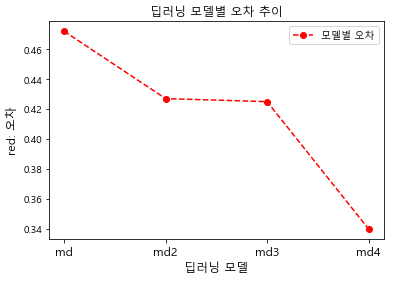

In [78]:
# 딥러닝 모델별 오차 추이

plt.plot(x_len, all_model_loss, 
         # 마커설정 옵션 'ro--'
         color = 'red', marker = 'o', linestyle = '--', 
         label = '모델별 오차')

plt.title('딥러닝 모델별 오차 추이')
plt.xlabel('딥러닝 모델', size = 12)
plt.xticks(x_len, ['md', 'md2', 'md3', 'md4'], size = 12)
plt.ylabel('red: 오차', size = 12)
plt.legend()

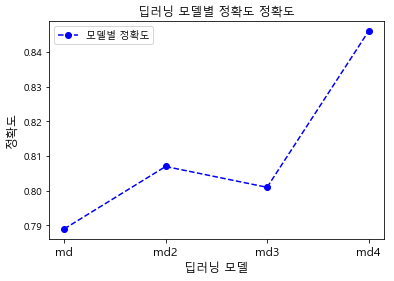

In [79]:
# 딥러닝 모델별 정확도 추이

plt.plot(x_len, all_model_acc, 
         # 마커설정 옵션 'bo--'
         color = 'blue', marker = 'o', linestyle = '--', 
         label = '모델별 정확도')

plt.title('딥러닝 모델별 정확도 정확도')
plt.xlabel('딥러닝 모델', size = 12)
plt.xticks(x_len, ['md', 'md2', 'md3', 'md4'], size = 12)
plt.ylabel('정확도', size = 12)
plt.legend()

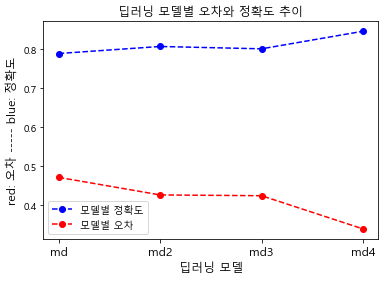

In [80]:
# 딥러닝 모델별 오차와 정확도 추이

plt.plot(x_len, all_model_acc, 'bo--', label = '모델별 정확도')
plt.plot(x_len, all_model_loss, 'ro--', label = '모델별 오차')
plt.title('딥러닝 모델별 오차와 정확도 추이')
plt.xlabel('딥러닝 모델', size = 12)
plt.xticks(x_len, ['md', 'md2', 'md3', 'md4'], size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

# 마커설정 옵션 'bo--', 'ro--'
# --> color = 'blue', marker = 'o', linestyle = '--' 의미임
# --> color = 'red', marker = 'o', linestyle = '--' 의미임

# <font color = 'blue'>피처셋 스케일링</font>
* 피처셋을 구성하는 개별 피처/입력/예측/독립 변수들의 수치를 0~1사이로 스케일링 필요
* 보통 딥러닝 신경망 기법에서는 피처데이터를 0~1사이로 스케일링 한 데이터인 경우 최적성능을 보임

#### (참고) 다양한 스케일링 기법: 자료의 분포를 평균 0, 분산 1 형태로 변경 
* scale(): 기본 스케일. 평균과 표준편차 사용
* robust_scale(): 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
* minmax_scale(): 최대/최소값이 각각 1, 0이 되도록 스케일링
* maxabs_scale(): 최대절대값과 0이 각각 1, 0이 되도록 스케일링

In [83]:
# sklearn 라이브러리의 스케일링 관련 메서트(함수) 로딩
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [97]:
ex = [-7.0, -2.0, -1.0, 0, 1, 2, 3, 4, 5, 20]
ex

[-7.0, -2.0, -1.0, 0, 1, 2, 3, 4, 5, 20]

In [99]:
ex_scaled = pd.DataFrame({'ex':ex, 'scale(ex)':scale(ex)})
ex_scaled

,ex,scale(ex)
0,-7.0,-1.421716
1,-2.0,-0.673444
2,-1.0,-0.523790
3,0.0,-0.374136
4,1.0,-0.224481
5,2.0,-0.074827
6,3.0,0.074827
7,4.0,0.224481
8,5.0,0.374136
9,20.0,2.618951


In [104]:
robust_scale(ex)

ValueError: Expected 2D array, got 1D array instead:
array=[-7. -2. -1.  0.  1.  2.  3.  4.  5. 20.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [98]:
ex_scaled = pd.DataFrame({'ex':ex, 'scale(ex)':scale(ex), 'robust_scale(ex)':robust_scale(ex), 
                          'minmax_scale(ex)':minmax_scale(ex), 'maxabs_scale(ex)':maxabs_scale(ex)})
ex_scaled

ValueError: Expected 2D array, got 1D array instead:
array=[-7. -2. -1.  0.  1.  2.  3.  4.  5. 20.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 피처셋 피처/입력/예측/독립변수 특성파악

In [ ]:
# 간단 변수컬럼 조회
df.head()

In [ ]:
# 피처셋 정보확인
X.info()

In [ ]:
# 피처셋 기술통계분석
X.describe()

In [ ]:
# 박스플롯을 이용한 피처셋 특성비교
X.boxplot()
# - 기본적인 데이터의 중심성, 변동성도 다르며,
#   아웃라이어도 각 피처별로 많이 있는 특성을 보임
# - 스케일링시 아웃라이어에 강한 방법 사용필요

In [ ]:
# 밀도곡선을 이용한 피처셋 특성비교
X.plot.kde()
# - 특정피처의 데이터분포가 상당히 이질적임을 알 수 있음

#### 피처셋 스케일링
* sklearn라이브러리 preprocessing모듈의 minmax_scale() 함수를 이용해 최대/최소값이 각각 1, 0이 되도록 스케일링

In [ ]:
# sklearn 라이브러리의 스케일링관련 모듈로딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
scaler = StandardScaler()
X_st = scaler.fit_transform(X)
X_st

In [ ]:
X_st_df = pd.DataFrame(X_st, columns = ['pregnant', 'plasma', 'pressure', 
                                        'thickness', 'insulin', 'BMI', 'pedigree', 'age'])
X_st_df.head(3)

In [ ]:
scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X)
X_mm

In [ ]:
X_mm_df = pd.DataFrame(X_mm, columns = ['pregnant', 'plasma', 'pressure', 
                                        'thickness', 'insulin', 'BMI', 'pedigree', 'age'])
X_mm_df.head(3)

In [ ]:
scaler = RobustScaler()
X_rb = scaler.fit_transform(X)
X_rb

In [ ]:
X_rb_df = pd.DataFrame(X_rb, columns = ['pregnant', 'plasma', 'pressure', 
                                        'thickness', 'insulin', 'BMI', 'pedigree', 'age'])
X_rb_df.head(3)

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize = (12, 5))

ax1.set_title('스케일링전 피처셋')
for i in X.columns:
    sns.kdeplot(X[i], ax=ax1)

ax2.set_title('기본 스케일링처리')
for i in X.columns:
    sns.kdeplot(X_st_df[i], ax=ax2)
    
ax3.set_title('Min-Max 스케일링처리')
for i in X.columns:
    sns.kdeplot(X_mm_df[i], ax=ax3)
    
ax4.set_title('Robust 스케일링처리')
for i in X.columns:
    sns.kdeplot(X_rb_df[i], ax=ax4)
    
# - Robust 스케일링처리 결과가 가장 피처셋의 분포를 전체적으로 통일시켜주었음 

In [ ]:
# Robust 스케일링처리된 피처셋의 기술통계
X_rb_df.describe()

# <font color = 'blue'>딥러닝 모델링: Robust 스케일링 피처셋 이용</font>
* 기존 데이터셋: X, y
* 스케일링 데이터셋: X_rb_df, y

#### 딥러닝 모델계층 설정
* <font color = 'red'>md_rb  모델</font>: 입력층(8개노드)-은닉층(12개노드)-은닉층(8개노드)-출력층(1개노드)
* <font color = 'red'>md2_rb 모델</font>: 입력층(8개노드)-은닉층(12개노드)-은닉층(24개노드)-은닉층(8개노드)-출력층(1개노드)
* <font color = 'red'>md3_rb 모델</font></font>: 입력층(8개노드)-은닉층(12개노드)-은닉층(8개노드)-출력층(1개노드)
* <font color = 'red'>md4_rb 모델</font>: 입력층(8개노드)-은닉층(24개노드)-은닉층(12개노드)-은닉층(8개노드)-출력층(1개노드)

#### 딥러닝 학습방법 설정
* 모든모델 동일: md_rb.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#### 딥러닝 모델에 데이터 피팅방법 설정
* md_rb.fit(X_rb_df, y, epochs = 200, batch_size = 10)
* md2_rb.fit(X_rb_df, y, epochs = 200, batch_size = 10)
* md3_rb.fit(X_rb_df, y, epochs = 1000, batch_size = 50)
* md4_rb.fit(X_rb_df, y, epochs = 2000, batch_size = 100)

### 딥러닝 라이브러리 로딩

In [ ]:
# 딥러닝 관련 라이브러리
import tensorflow as tf
# - 딥러닝 학습알고리즘

from keras.models import Sequential
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있도록 해줌

from keras.layers import Dense
# - 딥러닝 학습계층별 노드/유닛을 밀집시켜 학습방법을 설정할 수 있도록 해줌

### 랜덤 시드넘버 설정

In [ ]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

### 모델 학습계층 설정

In [ ]:
# 딥러닝 학습계층 설정

# 기본모델
# - 입력층(8개노드)-은닉층(12개노드)-은닉층(8개노드)-출력층(1개노드)
md_rb = Sequential()
md_rb.add(Dense(12, input_dim = 8, activation = 'relu'))
md_rb.add(Dense(8, activation = 'relu'))
md_rb.add(Dense(1, activation = 'sigmoid'))

# 신규모델
# - 입력층(8개노드)-은닉층(12개노드)-은닉층(24개노드)-은닉층(8개노드)-출력층(1개노드)
md2_rb = Sequential()
md2_rb.add(Dense(12, input_dim = 8, activation = 'relu'))
md2_rb.add(Dense(24, activation = 'relu'))
md2_rb.add(Dense(8, activation = 'relu'))
md2_rb.add(Dense(1, activation = 'sigmoid'))

# 기본모델
# - 입력층(8개노드)-은닉층(12개노드)-은닉층(8개노드)-출력층(1개노드)
md3_rb = Sequential()
md3_rb.add(Dense(12, input_dim = 8, activation = 'relu'))
md3_rb.add(Dense(8, activation = 'relu'))
md3_rb.add(Dense(1, activation = 'sigmoid'))

# 신규모델
# - 입력층(8개노드)-은닉층(24개노드)-은닉층(12개노드)-은닉층(8개노드)-출력층(1개노드)
md4_rb = Sequential()
md4_rb.add(Dense(24, input_dim = 8, activation = 'relu'))
md4_rb.add(Dense(12, activation = 'relu'))
md4_rb.add(Dense(8, activation = 'relu'))
md4_rb.add(Dense(1, activation = 'sigmoid'))

### 모델 훈련방법 설정

In [ ]:
# 준비된 학습계층의 학습방법 설정
md_rb.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])

md2_rb.compile(loss = 'binary_crossentropy', 
               optimizer = 'adam', metrics = ['accuracy'])

md3_rb.compile(loss = 'binary_crossentropy', 
               optimizer = 'adam', metrics = ['accuracy'])

md4_rb.compile(loss = 'binary_crossentropy', 
               optimizer = 'adam', metrics = ['accuracy'])

### 모델 훈련실시

In [ ]:
# 딥러닝 모델 최적화 훈련진행

# 기존 피팅방법
md_rb.fit(X_rb_df, y, batch_size = 10, epochs = 200)

# 기존 피팅방법
md2_rb.fit(X_rb_df, y, batch_size = 10, epochs = 200)

# 수정된 피팅방법
md3_rb.fit(X_rb_df, y, batch_size = 50, epochs = 1000)

# 수정된 피팅방법
md4_rb.fit(X_rb_df, y, batch_size = 100, epochs = 2000)

### 모델 성능평가: md 모형

In [ ]:
# 스케일링 실시전 성능
md_perf = md.evaluate(X, y)

print('모델성능 종합:', [round(i, 3) for i in md_perf])
print(f'모델성능 오차(loss): {md_perf[0]:0.3f}')
print(f'모델성능 정확도(accuracy): {md_perf[1]:0.3f}')

In [ ]:
# 스케일링 실시후 성능
md_rb_perf = md_rb.evaluate(X_rb_df, y)

print('모델성능 종합:', [round(i, 3) for i in md_rb_perf])
print(f'모델성능 오차(loss): {md_rb_perf[0]:0.3f}')
print(f'모델성능 정확도(accuracy): {md_rb_perf[1]:0.3f}')

### 모델 성능평가: md2 모형

In [ ]:
# 스케일링 실시전 성능
md2_perf = md2.evaluate(X, y)

print('모델성능 종합:', [round(i, 3) for i in md2_perf])
print(f'모델성능 오차(loss): {md2_perf[0]:0.3f}')
print(f'모델성능 정확도(accuracy): {md2_perf[1]:0.3f}')

In [ ]:
# 스케일링 실시후 성능
md2_rb_perf = md2_rb.evaluate(X_rb_df, y)

print('모델성능 종합:', [round(i, 3) for i in md2_rb_perf])
print(f'모델성능 오차(loss): {md2_rb_perf[0]:0.3f}')
print(f'모델성능 정확도(accuracy): {md2_rb_perf[1]:0.3f}')

### 모델 성능평가: md3 모형

In [ ]:
# 스케일링 실시전 성능
md3_perf = md3.evaluate(X, y)

print('모델성능 종합:', [round(i, 3) for i in md3_perf])
print(f'모델성능 오차(loss): {md3_perf[0]:0.3f}')
print(f'모델성능 정확도(accuracy): {md3_perf[1]:0.3f}')

In [ ]:
# 스케일링 실시후 성능
md3_rb_perf = md3_rb.evaluate(X_rb_df, y)

print('모델성능 종합:', [round(i, 3) for i in md3_rb_perf])
print(f'모델성능 오차(loss): {md3_rb_perf[0]:0.3f}')
print(f'모델성능 정확도(accuracy): {md3_rb_perf[1]:0.3f}')

### 모델 성능평가: md4 모형

In [ ]:
# 스케일링 실시전 성능
md4_perf = md4.evaluate(X, y)

print('모델성능 종합:', [round(i, 3) for i in md4_perf])
print(f'모델성능 오차(loss): {md4_perf[0]:0.3f}')
print(f'모델성능 정확도(accuracy): {md4_perf[1]:0.3f}')

In [ ]:
# 스케일링 실시후 성능
md4_rb_perf = md4_rb.evaluate(X_rb_df, y)

print('모델성능 종합:', [round(i, 3) for i in md4_rb_perf])
print(f'모델성능 오차(loss): {md4_rb_perf[0]:0.3f}')
print(f'모델성능 정확도(accuracy): {md4_rb_perf[1]:0.3f}')

# <font color = 'blue'>딥러닝 모델간 성능평가 비교: Robust 스케일링 피처셋 이용</font>

### 모델간 성능평가 비교

In [ ]:
# 스케일링 피처셋 사용 딥러닝 모델별 성능평가 결합
model_rb_perf = [md_rb_perf, md2_rb_perf, md3_rb_perf, md4_rb_perf]
model_rb_perf_loss = [md_rb_perf[0], md2_rb_perf[0], md3_rb_perf[0], md4_rb_perf[0]]
model_rb_perf_acc = [md_rb_perf[1], md2_rb_perf[1], md3_rb_perf[1], md4_rb_perf[1]]

In [ ]:
# 딥러닝 모델별 성능: 스케일링 실시전 성능
all_model_loss = [round(i, 3) for i in model_perf_loss]
all_model_acc = [round(j, 3) for j in model_perf_acc]
print('딥러닝 모델별  오차(loss): %s' % all_model_loss)
print('딥러닝 모델별 정확도(acc): %s' % all_model_acc)

In [ ]:
# 딥러닝 모델별 성능: 스케일링 실시후 성능
all_model_rb_loss = [round(i, 3) for i in model_rb_perf_loss]
all_model_rb_acc = [round(j, 3) for j in model_rb_perf_acc]
print('딥러닝 모델별  오차(loss): %s' % all_model_rb_loss)
print('딥러닝 모델별 정확도(acc): %s' % all_model_rb_acc)

### 시각화 모듈로딩 및 한글폰트 작업

In [ ]:
# 시각화 작업을 위한 모듈 로딩작업
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

In [ ]:
# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

In [ ]:
# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/nanumgothic.ttf").get_name()

In [ ]:
# 해당 한글폰트를 파이선 그래프에서 사용가능하도록 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# x축 길이계산
x_len = range(1, len(all_model_loss) + 1)
print('훈련셋 x축길이:', list(x_len))

### 딥러닝 모델별 오차와 정확도 성능비교

In [ ]:
# 딥러닝 모델별 오차 추이

plt.plot(x_len, all_model_loss, 
         # 마커설정 옵션 'ro--'
         color = 'red', marker = 'o', linestyle = '--', 
         label = '스케일링 실시전 모델별 오차')

plt.plot(x_len, all_model_rb_loss, 
         # 마커설정 옵션 'r^-'
         color = 'red', marker = '^', linestyle = '-', 
         label = '스케일링 실시후 모델별 오차')

plt.title('딥러닝 모델별 오차 추이')
plt.xlabel('딥러닝 모델', size = 12)
plt.xticks(x_len, ['md', 'md2', 'md3', 'md4'], size = 12)
plt.ylabel('red: 오차', size = 12)
plt.legend()

In [ ]:
# 딥러닝 모델별 정확도 추이

plt.plot(x_len, all_model_rb_acc, 
         # 마커설정 옵션 'b^-'
         color = 'blue', marker = '^', linestyle = '-', 
         label = '스케일링 실시후 모델별 정확도')

plt.plot(x_len, all_model_acc, 
         # 마커설정 옵션 'bo--'
         color = 'blue', marker = 'o', linestyle = '--', 
         label = '스케일링 실시전 모델별 정확도')

plt.title('딥러닝 모델별 정확도 추이')
plt.xlabel('딥러닝 모델', size = 12)
plt.xticks(x_len, ['md', 'md2', 'md3', 'md4'], size = 12)
plt.ylabel('정확도', size = 12)
plt.legend()

In [ ]:
# 딥러닝 모델별 오차와 정확도 추이

plt.plot(x_len, all_model_acc, 'bo--', label = '스케일링 실시전 모델별 정확도')
plt.plot(x_len, all_model_rb_acc, 'b^-', label = '스케일링 실시후 모델별 정확도')

plt.plot(x_len, all_model_loss, 'ro--', label = '스케일링 실시전 모델별 오차')
plt.plot(x_len, all_model_rb_loss, 'r^-', label = '스케일링 실시후 모델별 오차')

plt.title('딥러닝 모델별 오차와 정확도 추이')
plt.xlabel('딥러닝 모델', size = 12)
plt.xticks(x_len, ['md', 'md2', 'md3', 'md4'], size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend(bbox_to_anchor=(1.05, 0.7), loc=2, borderaxespad=0.)

# <font color = 'blue'>딥러닝 훈련모델 저장과 재사용</font>

* 메모리상에 생성한 딥러닝 훈련모델의 성능이 좋을 때 이를 별도 파일로 저장하고 필요시 메모리로 로딩해 재활용 할 수 있음

### 메모리상의 딥러닝 훈련모델을 파일로 저장

In [ ]:
# 현재 메모리상에 있는 훈련모델 객체중 베스트모델을 하드디스크에 저장
md4_rb.save('pima_md4_rb.h5')

# - .h5확장자: HDF 파일포맷(Hierarchical Data Format: 계층적 데이터 형식)
# - 대용량 데이터저장과 빠른 검색속도를 지원하는 포맷임

In [ ]:
# 하드디스크에 저장된 훈련모델 객체 파일 확인
import glob

glob.glob('*.h5')

### 메모리상의 딥러닝 훈련모델 삭제

In [ ]:
# 현재 메모리상에 있던 특정객체 삭제
del md4_rb

In [ ]:
# 현재 메모리 객체목록 확인
%whos

### 하드디스크에 있는 딥러닝 훈련모델 파일을 메모리로 로딩

In [ ]:
from keras.models import load_model
md4_rb = load_model('pima_md4_rb.h5')

### 로딩한 훈련모델 재사용

In [ ]:
# 별도의 테스트셋이 있다는 가정하에 재활용
md4_rb_test_perf = md4_rb.evaluate(X_rb_df, y)
md4_rb_test_loss = md4_rb_test_perf[0]
md4_rb_test_acc = md4_rb_test_perf[1]

print('테스트셋 성능종합:', [round(i, 3) for i in md4_rb_test_perf])
print(f'테스트셋 오차(loss): {md4_rb_test_loss:0.3f}')
print(f'테스트셋 정확도(accuracy): {md4_rb_test_acc:0.3f}')

# <font color = 'blue'>선정된 딥러닝모델 예측목적 사용</font>

* 비교한 여러 딥러닝 분류모형 중 가장 성능이 우수한 모델을 가지고 새로운 데이터셋을 이용해 분류예측을 실시함
* 베스트모델이 스케일링된 피처셋을 사용해서 만든 것이므로 새로운 데이터셋도 스케일링을 동일하게 실시해야함

### 예측대상 새로운 데이터셋 로딩

In [ ]:
# 새로운 분류대상 데이터셋 로딩
dfn = pd.read_csv('./dataset/pima_new.csv')
print(dfn.shape)
dfn.head()
# - 피처셋만 있으며, 타겟변수는 없는 상태임

### 새로운 데이터셋 특성파악

In [ ]:
# 간단 변수컬럼 조회
dfn.head()
# - 타겟변수가 없는 피처셋으로만 구성되어 있음
# - 주어진 피처셋으로 타겟변수 예측을 해야함

In [ ]:
# 피처셋 정보확인
dfn.info()

In [ ]:
# 피처셋 기술통계분석
dfn.describe()

In [ ]:
# 박스플롯을 이용한 피처셋 특성비교
dfn.boxplot()
# - 기본적인 데이터의 중심성, 변동성도 다르며,
#   아웃라이어도 각 피처별로 많이 있는 특성을 보임
# - 스케일링시 아웃라이어에 강한 방법 사용필요

In [ ]:
# 밀도곡선을 이용한 피처셋 특성비교
dfn.plot.kde()
# - 특정피처의 데이터분포가 상당히 이질적임을 알 수 있음

#### 피처셋 스케일링
* sklearn라이브러리 preprocessing모듈의 minmax_scale() 함수를 이용해 최대/최소값이 각각 1, 0이 되도록 스케일링

In [ ]:
# sklearn 라이브러리의 스케일링관련 모듈로딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
scaler = StandardScaler()
dfn_st = scaler.fit_transform(dfn)
dfn_st

In [ ]:
dfn_st_df = pd.DataFrame(X_st, columns = ['pregnant', 'plasma', 'pressure', 
                                          'thickness', 'insulin', 'BMI', 'pedigree', 'age'])
dfn_st_df.head(3)

In [ ]:
scaler = MinMaxScaler()
dfn_mm = scaler.fit_transform(dfn)
dfn_mm

In [ ]:
dfn_mm_df = pd.DataFrame(dfn_mm, columns = ['pregnant', 'plasma', 'pressure', 
                                            'thickness', 'insulin', 'BMI', 'pedigree', 'age'])
dfn_mm_df.head(3)

In [ ]:
scaler = RobustScaler()
dfn_rb = scaler.fit_transform(dfn)
dfn_rb

In [ ]:
dfn_rb_df = pd.DataFrame(dfn_rb, columns = ['pregnant', 'plasma', 'pressure', 
                                            'thickness', 'insulin', 'BMI', 'pedigree', 'age'])
dfn_rb_df.head(3)

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize = (12, 5))

ax1.set_title('스케일링전 피처셋')
for i in X.columns:
    sns.kdeplot(dfn[i], ax=ax1)

ax2.set_title('기본 스케일링처리')
for i in X.columns:
    sns.kdeplot(dfn_st_df[i], ax=ax2)
    
ax3.set_title('Min-Max 스케일링처리')
for i in X.columns:
    sns.kdeplot(dfn_mm_df[i], ax=ax3)
    
ax4.set_title('Robust 스케일링처리')
for i in X.columns:
    sns.kdeplot(dfn_rb_df[i], ax=ax4)
    
# - Robust 스케일링처리 결과가 가장 피처셋의 분포를 전체적으로 통일시켜주었음 

In [ ]:
# Robust 스케일링처리된 피처셋의 기술통계
dfn_rb_df.describe()

### 예측모델에 새로운 데이터셋 피팅

In [ ]:
# 새로운 피처셋을 성능비교에서 가장우수한 분류예측 모델에 피팅
dfn_rb_prob = md4_rb.predict(dfn_rb)

print(type(dfn_rb_prob), dfn_rb_prob.shape)
dfn_rb_prob[0:10]
# - 예측결과는 개별 레코드별로 0 ~ 1 사이의 확률값으로 나옴
# - 0.5를 기준으로 1에 가까울수록 1로, 0에 가까울수록 0으로 판단

### 예측된 확률값으로 0.5를 cutoff기준으로 간주해 0 또는 1로 분류함

In [ ]:
# round함수 이용 0, 1로 예측분류
dfn_rb_pred = [round(i[0]) for i in dfn_rb_prob]
print(type(dfn_rb_pred), len(dfn_rb_pred))
dfn_rb_pred[0:10]

In [ ]:
# 조건비교를 통햔 0, 1로 예측분류
dfn_rb_predic = []
for i in dfn_rb_prob:
    if i >= 0.5:
        dfn_rb_predic.append(1)
    else:
        dfn_rb_predic.append(0)
        
print(type(dfn_rb_predic), len(dfn_rb_predic))
dfn_rb_pred[0:10]

### 타겟변수 클래스별 빈도와 비율 분포

In [ ]:
# 분류결과 타겟변수로 데이터셋에 추가 
dfn['class'] = dfn_rb_pred
dfn.head()

In [ ]:
# 타겟변수 클래스 레이블 붙이기
dfn['class2'] = dfn['class'].map({1:'yes', 0:'no'})
dfn['class2'] = dfn['class2'].astype('category')
dfn.head()

In [ ]:
for csn, csl, csv in zip(dfn['class'].unique(), dfn['class2'].unique(), dfn['class'].value_counts()):
    pct = csv / dfn['class'].value_counts().sum() 
    print(f"레이블: {csn}, 레이블: {csl:3s}, 빈도수: {csv}, 비율: {pct:0.3f}") 

# End of Source